# PROJECT: SALARY PREDICTION WITH MACHINE LEARNING

# Business Problem

**Can a machine learning project be carried out to predict the salaries of baseball players based on salary information and career statistics for the year 1986?**

# Dataset Story

**This dataset was originally sourced from the StatLib library at Carnegie Mellon University. The data is part of the dataset used in the 1988 ASA Graphics Section Poster Session. The salary data was originally obtained from Sports Illustrated, April 20, 1987. The 1986 and career statistics were obtained from the 1987 Baseball Encyclopedia Update published by Collier Books, Macmillan Publishing Company, New York.**

# FEATURES
| Variable     | Description                                                                                              |
|--------------|----------------------------------------------------------------------------------------------------------|
| AtBat        | Number of times a baseball bat was used to hit the ball in the 1986-1987 season                         |
| Hits         | Number of hits in the 1986-1987 season                                                                  |
| HmRun        | Number of home runs in the 1986-1987 season                                                             |
| Runs         | Number of runs scored for the team in the 1986-1987 season                                               |
| RBI          | Number of players driven home by the hitter's hits                                                        |
| Walks        | Number of walks (errors by the opposing players)                                                         |
| Years        | Number of years the player has played in the major leagues                                                |
| CAtBat       | Career number of times a baseball bat was used to hit the ball                                           |
| CHits        | Career number of hits                                                                                     |
| CHmRun       | Career number of home runs                                                                              |
| CRuns        | Career number of runs scored for the team                                                                 |
| CRBI         | Career number of players driven home by the hitter's hits                                                 |
| CWalks       | Career number of walks (errors by the opposing players)                                                   |
| League       | Factor indicating the league played in by the player by the end of the season (A or N)                   |
| Division     | Factor indicating the division in which the player played at the end of 1986 (E or W)                     |
| PutOuts      | Number of putouts (assists to teammates during the game)                                                  |
| Assits       | Number of assists made by the player in the 1986-1987 season                                             |
| Errors       | Number of errors made by the player in the 1986-1987 season                                               |
| Salary       | Salary of the player in the 1986-1987 season (in thousands)                                               |
| NewLeague    | Factor indicating the league played in by the player at the start of the 1987 season (A or N)             |

# IMPORTINGS

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import missingno as msno

from sklearn.metrics import mean_squared_error, mean_absolute_error, f1_score
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, cross_val_score, RandomizedSearchCV, validation_curve
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.exceptions import ConvergenceWarning

from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 170)
pd.set_option('display.max_rows', 20)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [128]:
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action="ignore", category=ConvergenceWarning)
#warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

# ADVANCED FUNCTIONAL EDA

In [5]:
df = pd.read_csv("/Users/mustafaemircan/PycharmProjects/MiuulBootcamp/PROJECTS/Machine Learning PROJECT/BONUS PROJECT/hitters.csv")

In [6]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.000,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.000,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.000,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.500,N


In [11]:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Duplicated Values #####################")
    print(dataframe.duplicated().sum())
    print("##################### Missing Values #####################")
    print(dataframe.isnull().sum())
    print("##################### Number of Unique Values #####################")
    print(df.nunique())

In [12]:
check_df(df)

##################### Shape #####################
(322, 20)
##################### Types #####################
AtBat          int64
Hits           int64
HmRun          int64
Runs           int64
RBI            int64
Walks          int64
Years          int64
CAtBat         int64
CHits          int64
CHmRun         int64
CRuns          int64
CRBI           int64
CWalks         int64
League        object
Division      object
PutOuts        int64
Assists        int64
Errors         int64
Salary       float64
NewLeague     object
dtype: object
##################### Duplicated Values #####################
0
##################### Missing Values #####################
AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64


In [13]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """

    Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.
    Not: Kategorik değişkenlerin içerisine numerik görünümlü kategorik değişkenler de dahildir.

    Parameters
    ------
        dataframe: dataframe
                Değişken isimleri alınmak istenilen dataframe
        cat_th: int, optional
                numerik fakat kategorik olan değişkenler için sınıf eşik değeri
        car_th: int, optinal
                kategorik fakat kardinal değişkenler için sınıf eşik değeri

    Returns
    ------
        cat_cols: list
                Kategorik değişken listesi
        num_cols: list
                Numerik değişken listesi
        cat_but_car: list
                Kategorik görünümlü kardinal değişken listesi

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = toplam değişken sayısı
        num_but_cat cat_cols'un içerisinde.
        Return olan 3 liste toplamı toplam değişken sayısına eşittir: cat_cols + num_cols + cat_but_car = değişken sayısı

    """


    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car


In [14]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)
print("#############")
print(f"Cat_Cols : {cat_cols}")
print("#############")
print(f"Num_Cols : {num_cols}")
print("#############")
print(f"Cat_But_Car : {cat_but_car}")

Observations: 322
Variables: 20
cat_cols: 3
num_cols: 17
cat_but_car: 0
num_but_cat: 0
#############
Cat_Cols : ['League', 'Division', 'NewLeague']
#############
Num_Cols : ['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat', 'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists', 'Errors', 'Salary']
#############
Cat_But_Car : []


# Analysis of Categorical Variables

In [19]:
def cat_summary(dataframe, col_name, plot=False):
    summary_df = pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                               "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)})
    print("######################### *** #########################")
    print(summary_df)
    print("######################### *** #########################")
    if plot:
        fig, axs = plt.subplots(1, 4, figsize=(18, 5))
        counts = dataframe[col_name].value_counts()
        ratios = 100 * counts / len(dataframe)
        # Count Plot
        ax = sns.countplot(x=col_name, data=dataframe, ax=axs[0], order=counts.index)
        axs[0].set_title("Frequency of " + col_name)
        axs[0].tick_params(axis='x', rotation=90)
        for i, p in enumerate(ax.patches):
            height = p.get_height()
            ax.text(p.get_x() + p.get_width() / 2., height + 0.01 * max(counts),
                    f'{ratios.iloc[i]:.2f}%', 
                    ha="center", va="bottom", rotation=60)
        # Pie Chart
        wedges, texts, autotexts = axs[1].pie(x=counts, autopct='%1.1f%%', textprops=dict(color="w"))
        axs[1].set_title("Pie chart of " + col_name)
        # Add legend to pie chart
        axs[1].legend(wedges, counts.index,
                      title=col_name,
                      loc="center left",
                      bbox_to_anchor=(1, 0, 0.5, 1))
        # Example of a Box Plot
        sns.boxplot(data=dataframe, x=col_name, y="Salary", ax=axs[2], order=counts.index)
        axs[2].set_title("Salary vs " + col_name)
        axs[2].tick_params(axis='x', rotation=90)
        # Another Box Plot
        sns.boxplot(data=dataframe, x=col_name, y="Years", ax=axs[3], order=counts.index)
        axs[3].set_title("Years vs " + col_name)
        axs[3].tick_params(axis='x', rotation=90)
        plt.tight_layout()
        plt.show()

######################### *** #########################
        League  Ratio
League               
A          175 54.348
N          147 45.652
######################### *** #########################


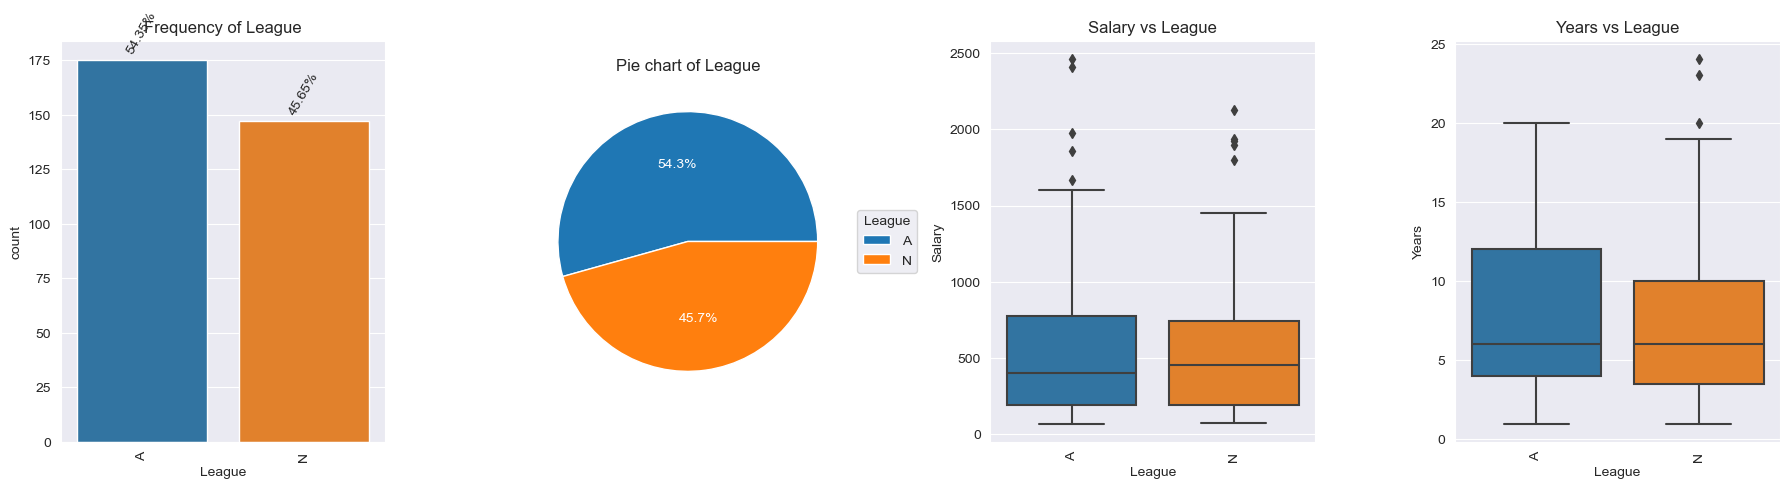

######################### *** #########################
          Division  Ratio
Division                 
W              165 51.242
E              157 48.758
######################### *** #########################


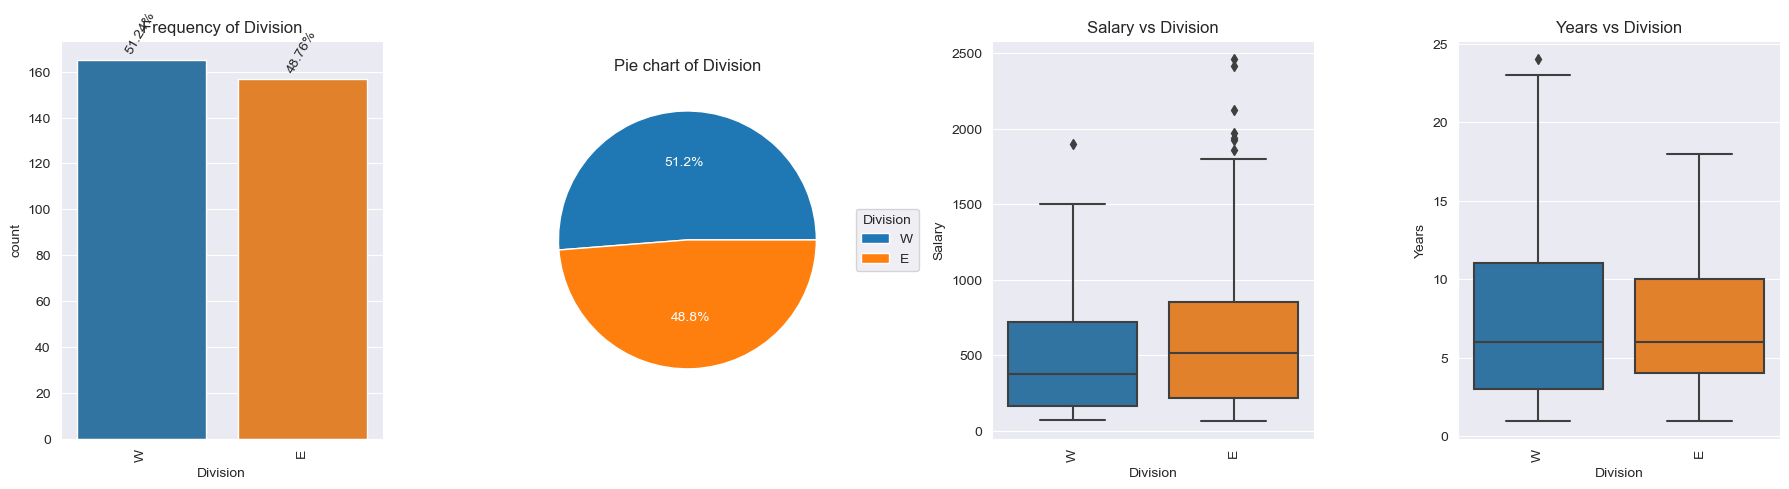

######################### *** #########################
           NewLeague  Ratio
NewLeague                  
A                176 54.658
N                146 45.342
######################### *** #########################


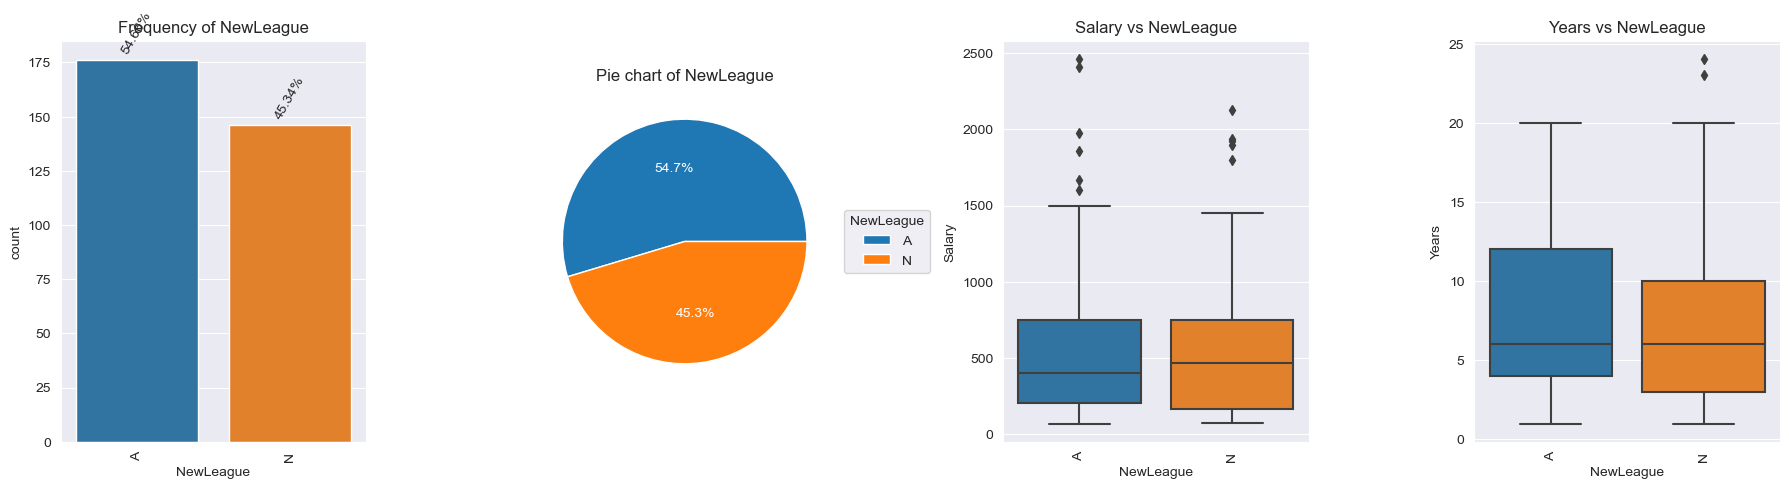

In [20]:
for col in cat_cols:
    cat_summary(df, col, plot=True)

# Analysis of Numerical Variables

In [23]:
def num_summary(dataframe, numerical_col, plot=False, target_col=None):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    desc = dataframe[numerical_col].describe(quantiles)
    skewness = dataframe[numerical_col].skew()
    kurtosis = dataframe[numerical_col].kurtosis()
    
    print(desc)
    print(f"Skewness: {skewness:.2f}")
    print(f"Kurtosis: {kurtosis:.2f}")
    
    if plot:
        fig, axs = plt.subplots(3, 2, figsize=(12, 14))
        
        # Histogram
        axs[0, 0].hist(dataframe[numerical_col], bins=50)
        axs[0, 0].set_xlabel(numerical_col)
        axs[0, 0].set_title(numerical_col + ' Distribution')
        
        # Boxplot
        sns.boxplot(y=numerical_col, data=dataframe, ax=axs[0, 1])
        axs[0, 1].set_title("Boxplot of " + numerical_col)
        
        # Violin Plot
        sns.violinplot(y=numerical_col, data=dataframe, ax=axs[1, 0])
        axs[1, 0].set_title("Violin Plot of " + numerical_col)
        
        # Density Plot
        sns.kdeplot(dataframe[numerical_col], shade=True, ax=axs[1, 1])
        axs[1, 1].set_xlabel(numerical_col)
        axs[1, 1].set_title(numerical_col + ' Density')
        
        # QQ Plot
        stats.probplot(dataframe[numerical_col], dist="norm", plot=axs[2, 0])
        axs[2, 0].set_title(numerical_col + ' QQ Plot')
        
        # Correlation Heatmap
        corr = dataframe[[numerical_col, target_col]].corr()
        sns.heatmap(corr, annot=True, cmap='Blues', ax=axs[2, 1], annot_kws={"size": 16, "weight": "bold", "color":"red"})
        axs[2, 1].set_title(f'Correlation Heatmap of {numerical_col} and {target_col}')
        
        plt.tight_layout()
        plt.show()

    print("#####################################")

count   322.000
mean    380.929
std     153.405
min      16.000
5%      161.000
10%     194.100
20%     221.800
30%     281.300
40%     321.800
50%     379.500
60%     430.200
70%     490.000
80%     535.600
90%     584.900
95%     609.900
99%     658.590
max     687.000
Name: AtBat, dtype: float64
Skewness: -0.08
Kurtosis: -0.89


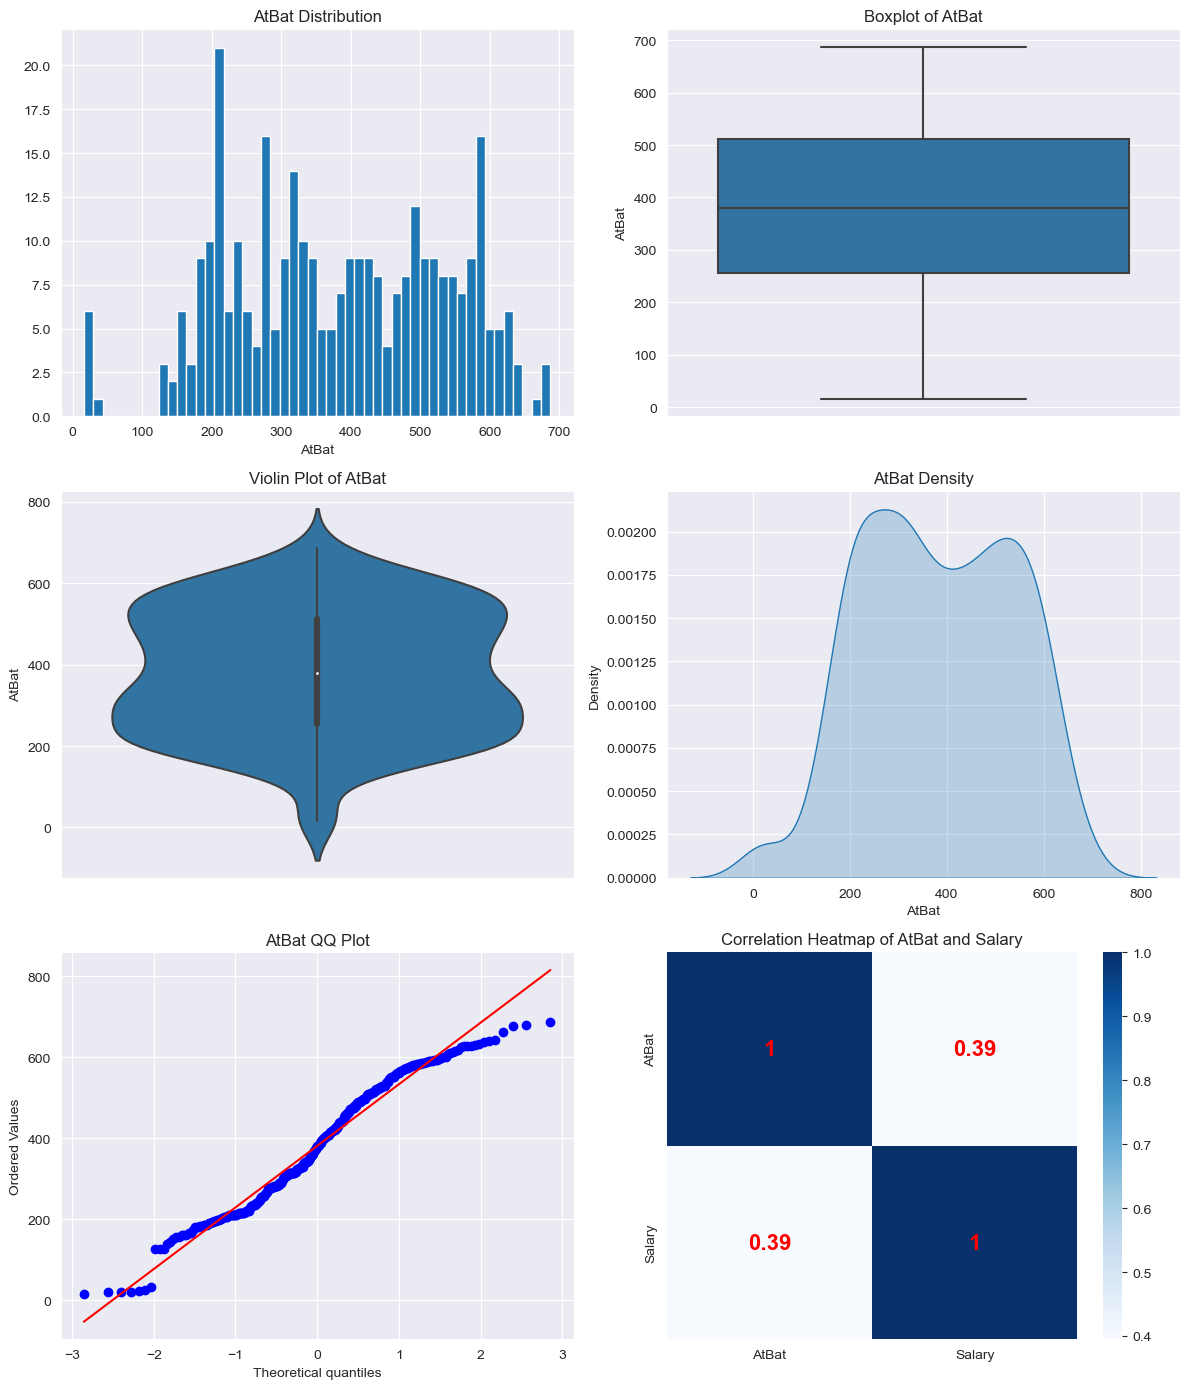

#####################################
count   322.000
mean    101.025
std      46.455
min       1.000
5%       39.000
10%      45.100
20%      57.000
30%      70.000
40%      82.000
50%      96.000
60%     113.000
70%     128.700
80%     144.000
90%     163.000
95%     174.000
99%     210.790
max     238.000
Name: Hits, dtype: float64
Skewness: 0.29
Kurtosis: -0.50


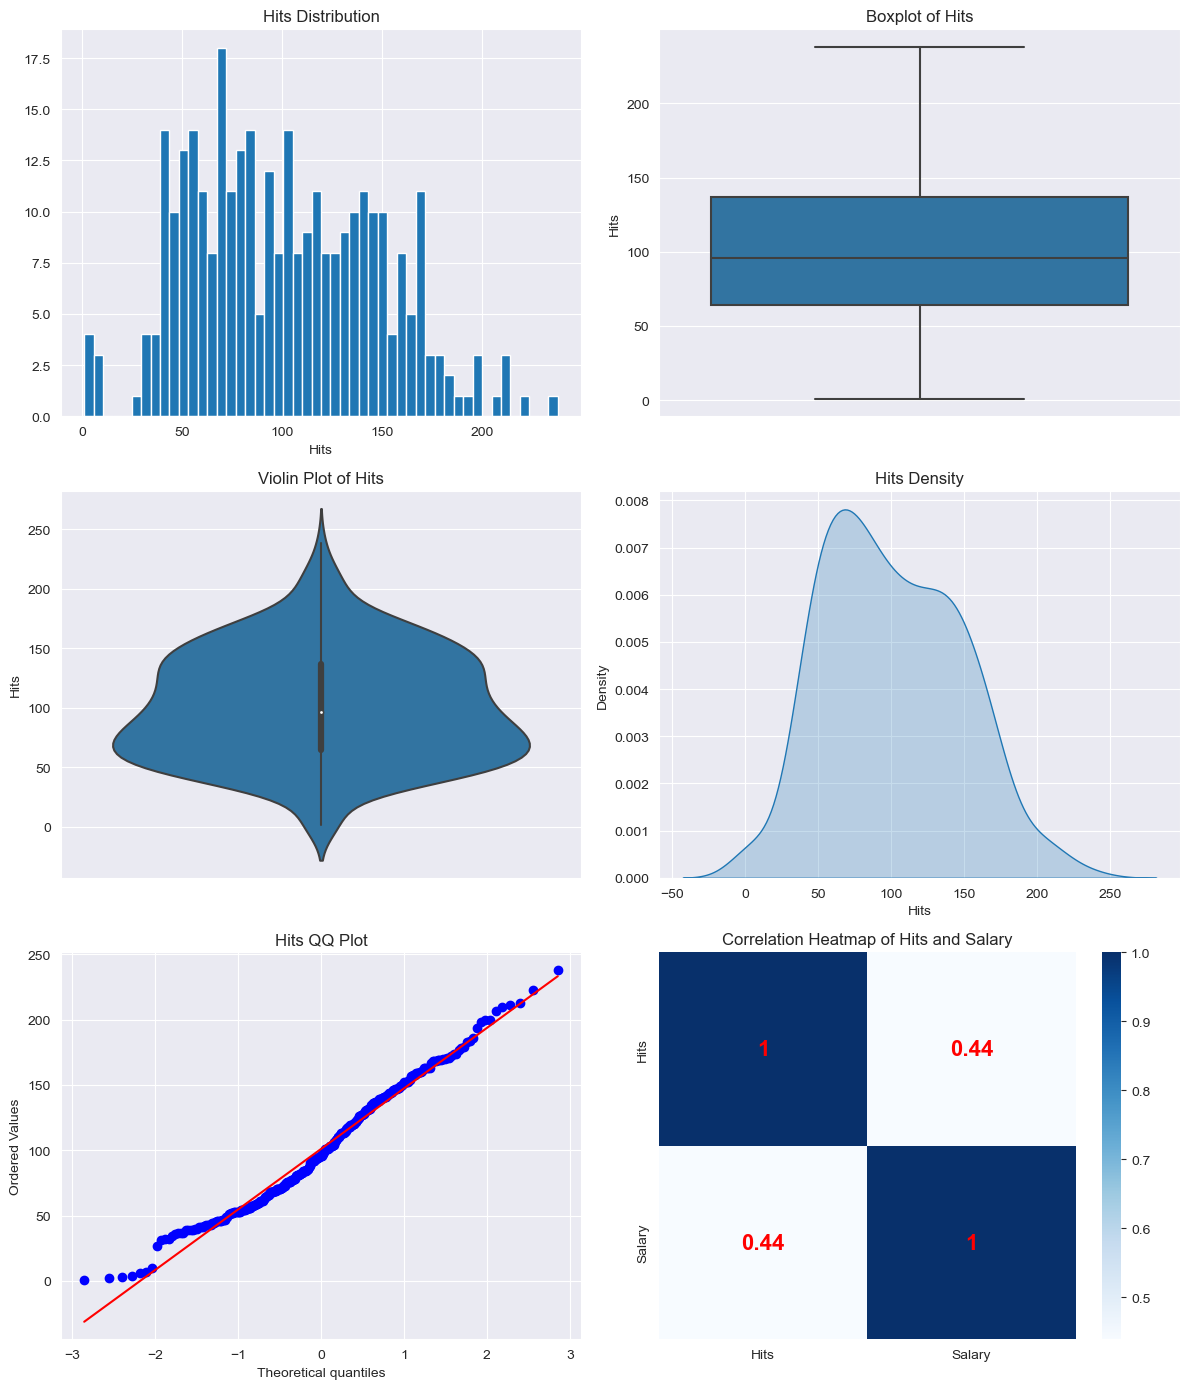

#####################################
count   322.000
mean     10.770
std       8.709
min       0.000
5%        0.000
10%       1.000
20%       3.000
30%       5.000
40%       6.000
50%       8.000
60%      10.600
70%      14.000
80%      18.000
90%      24.000
95%      28.950
99%      33.000
max      40.000
Name: HmRun, dtype: float64
Skewness: 0.90
Kurtosis: 0.04


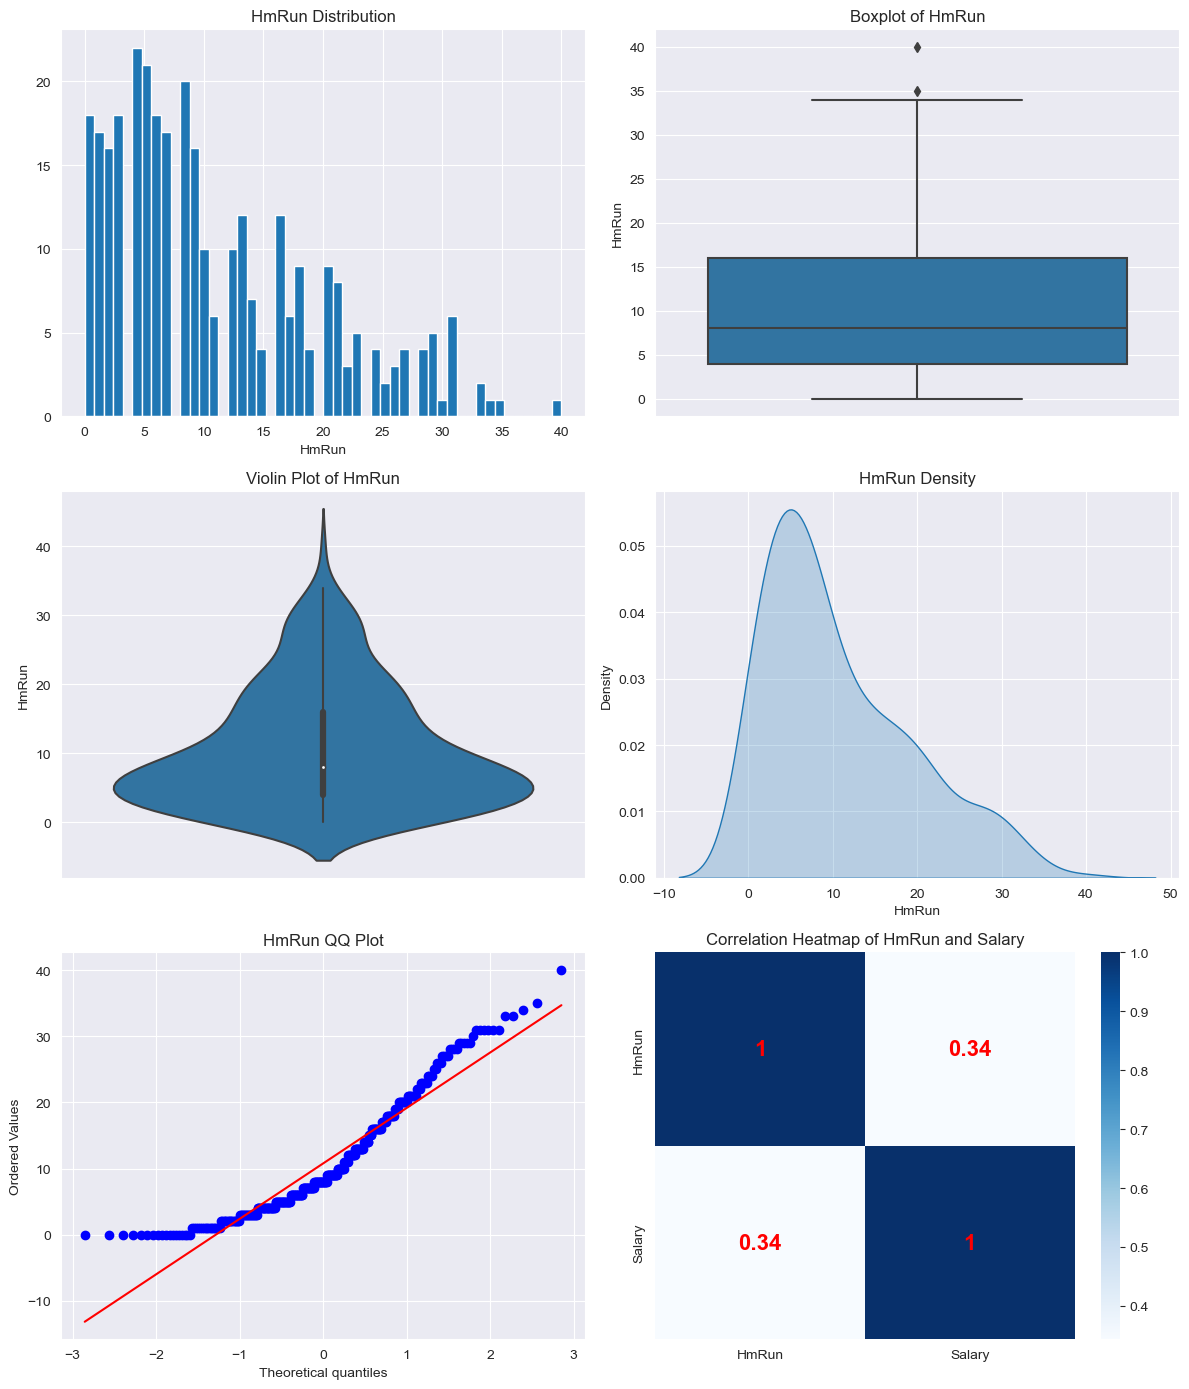

#####################################
count   322.000
mean     50.910
std      26.024
min       0.000
5%       17.000
10%      20.100
20%      27.000
30%      33.000
40%      41.000
50%      48.000
60%      55.600
70%      66.000
80%      75.800
90%      89.000
95%      94.000
99%     107.790
max     130.000
Name: Runs, dtype: float64
Skewness: 0.42
Kurtosis: -0.52


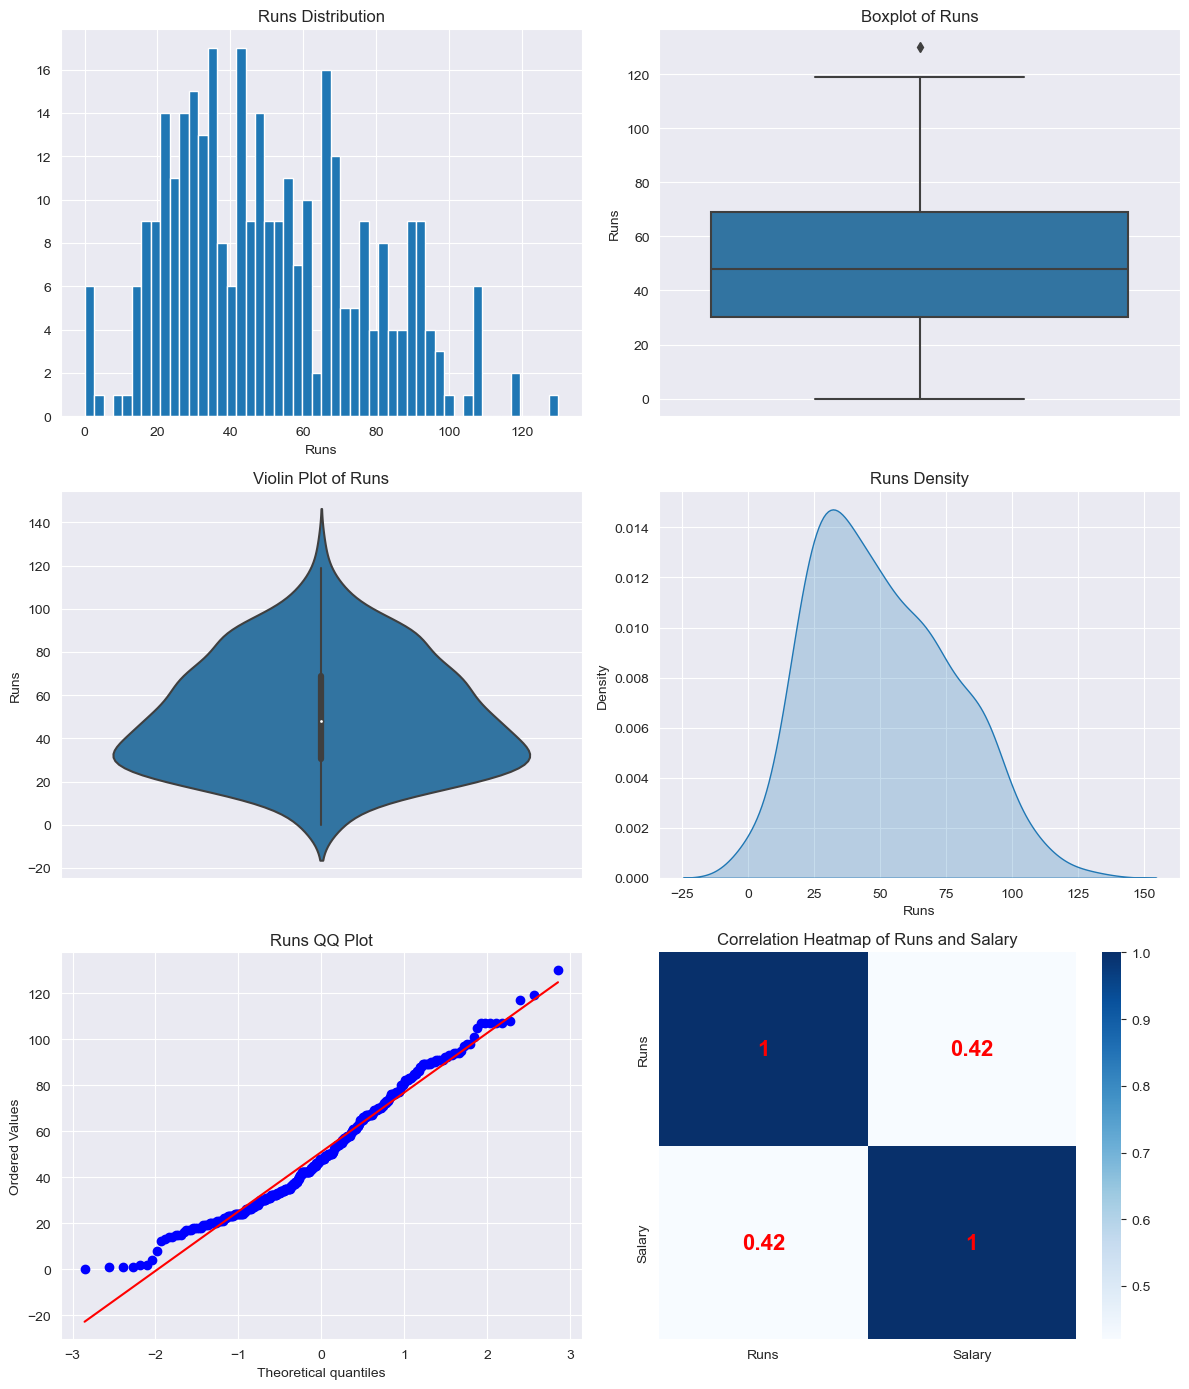

#####################################
count   322.000
mean     48.028
std      26.167
min       0.000
5%       14.000
10%      19.000
20%      26.000
30%      30.000
40%      36.400
50%      44.000
60%      49.000
70%      58.000
80%      73.000
90%      86.000
95%      96.000
99%     112.370
max     121.000
Name: RBI, dtype: float64
Skewness: 0.61
Kurtosis: -0.30


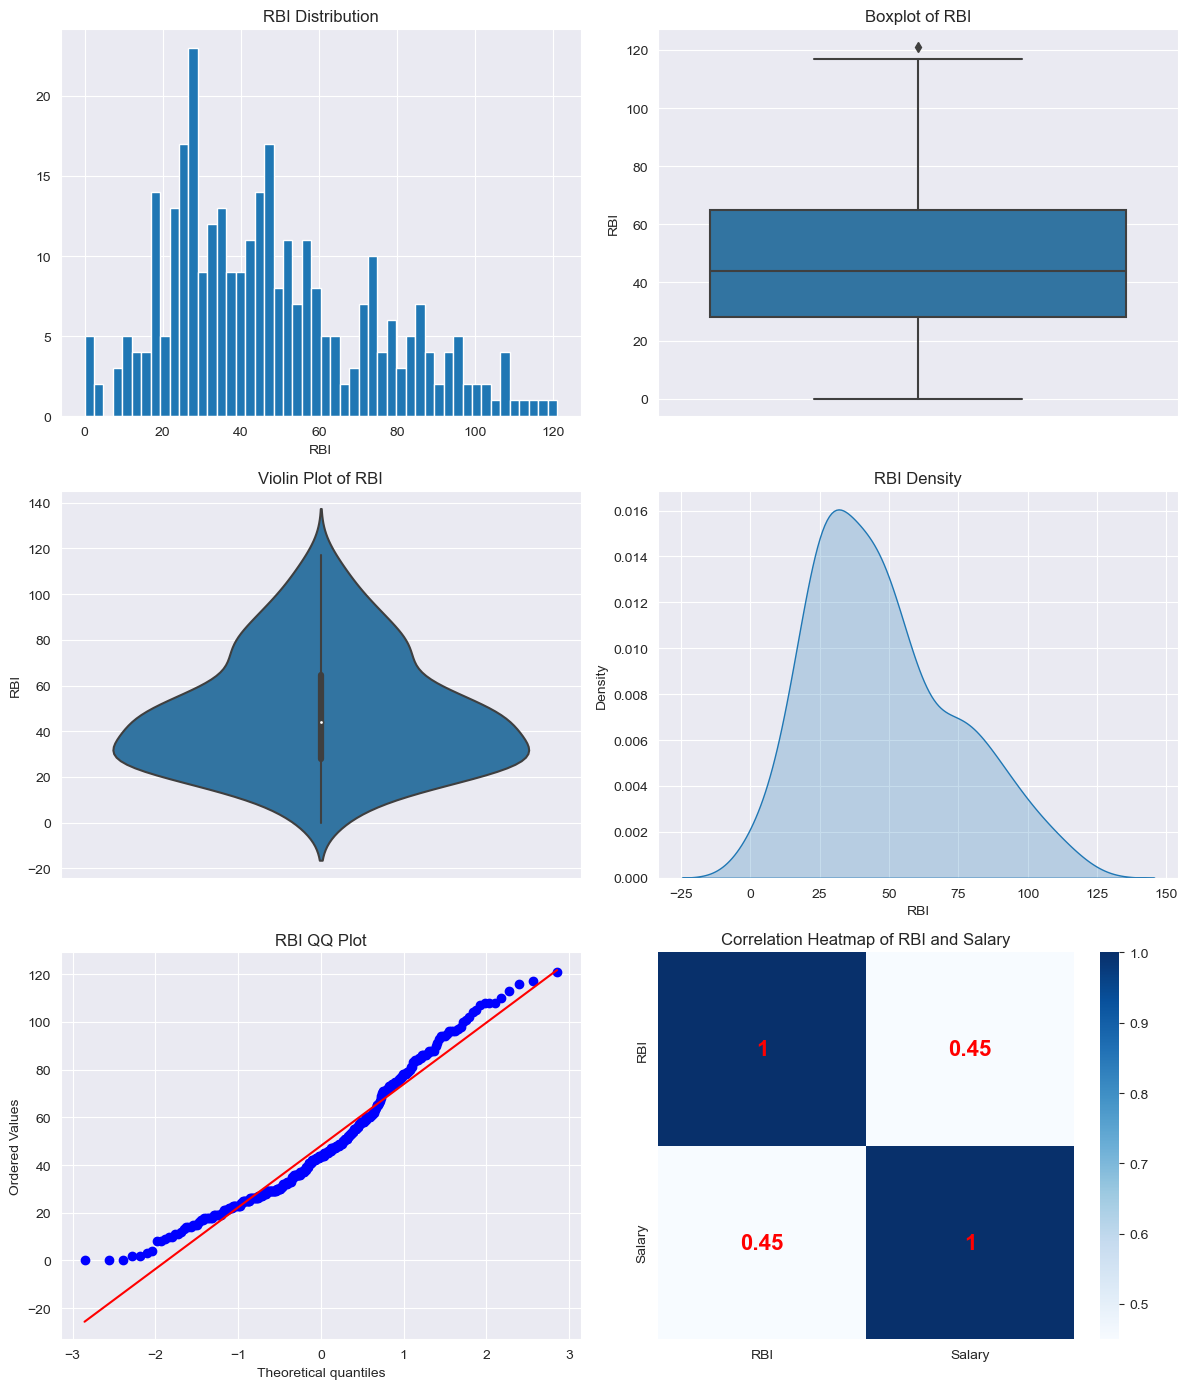

#####################################
count   322.000
mean     38.742
std      21.639
min       0.000
5%       11.050
10%      15.000
20%      20.000
30%      24.000
40%      30.000
50%      35.000
60%      40.000
70%      48.700
80%      59.000
90%      69.900
95%      78.000
99%      93.580
max     105.000
Name: Walks, dtype: float64
Skewness: 0.62
Kurtosis: -0.26


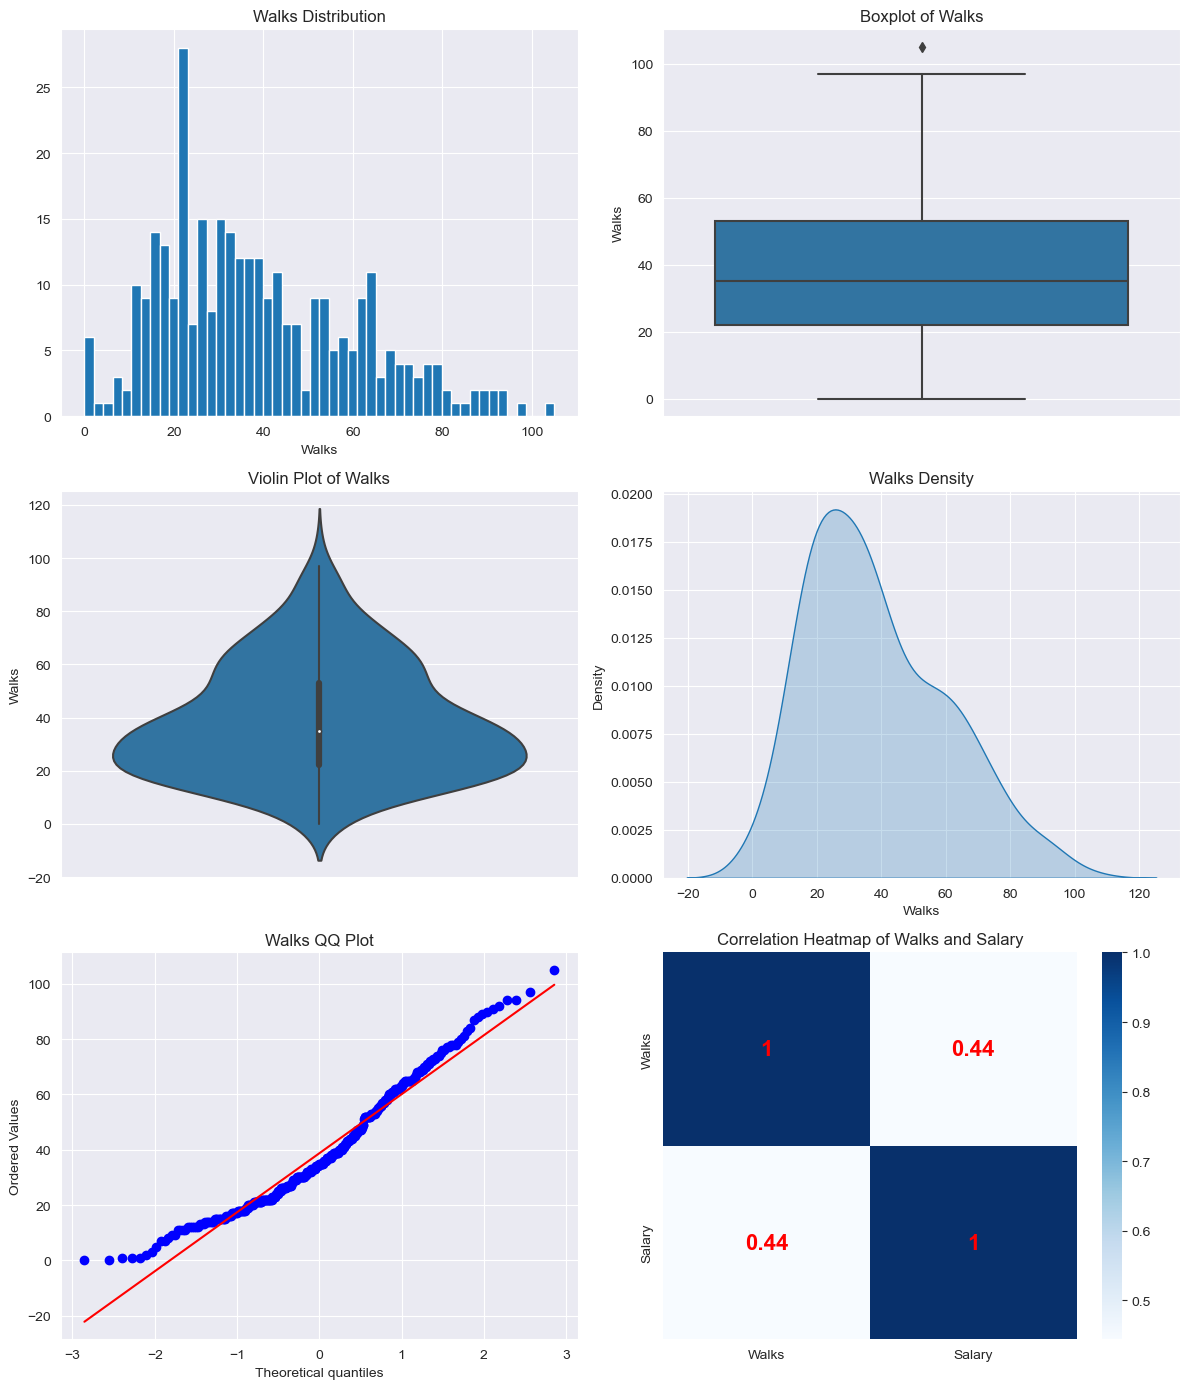

#####################################
count   322.000
mean      7.444
std       4.926
min       1.000
5%        1.000
10%       2.000
20%       3.000
30%       4.000
40%       5.000
50%       6.000
60%       7.600
70%      10.000
80%      12.000
90%      15.000
95%      17.000
99%      19.790
max      24.000
Name: Years, dtype: float64
Skewness: 0.78
Kurtosis: -0.15


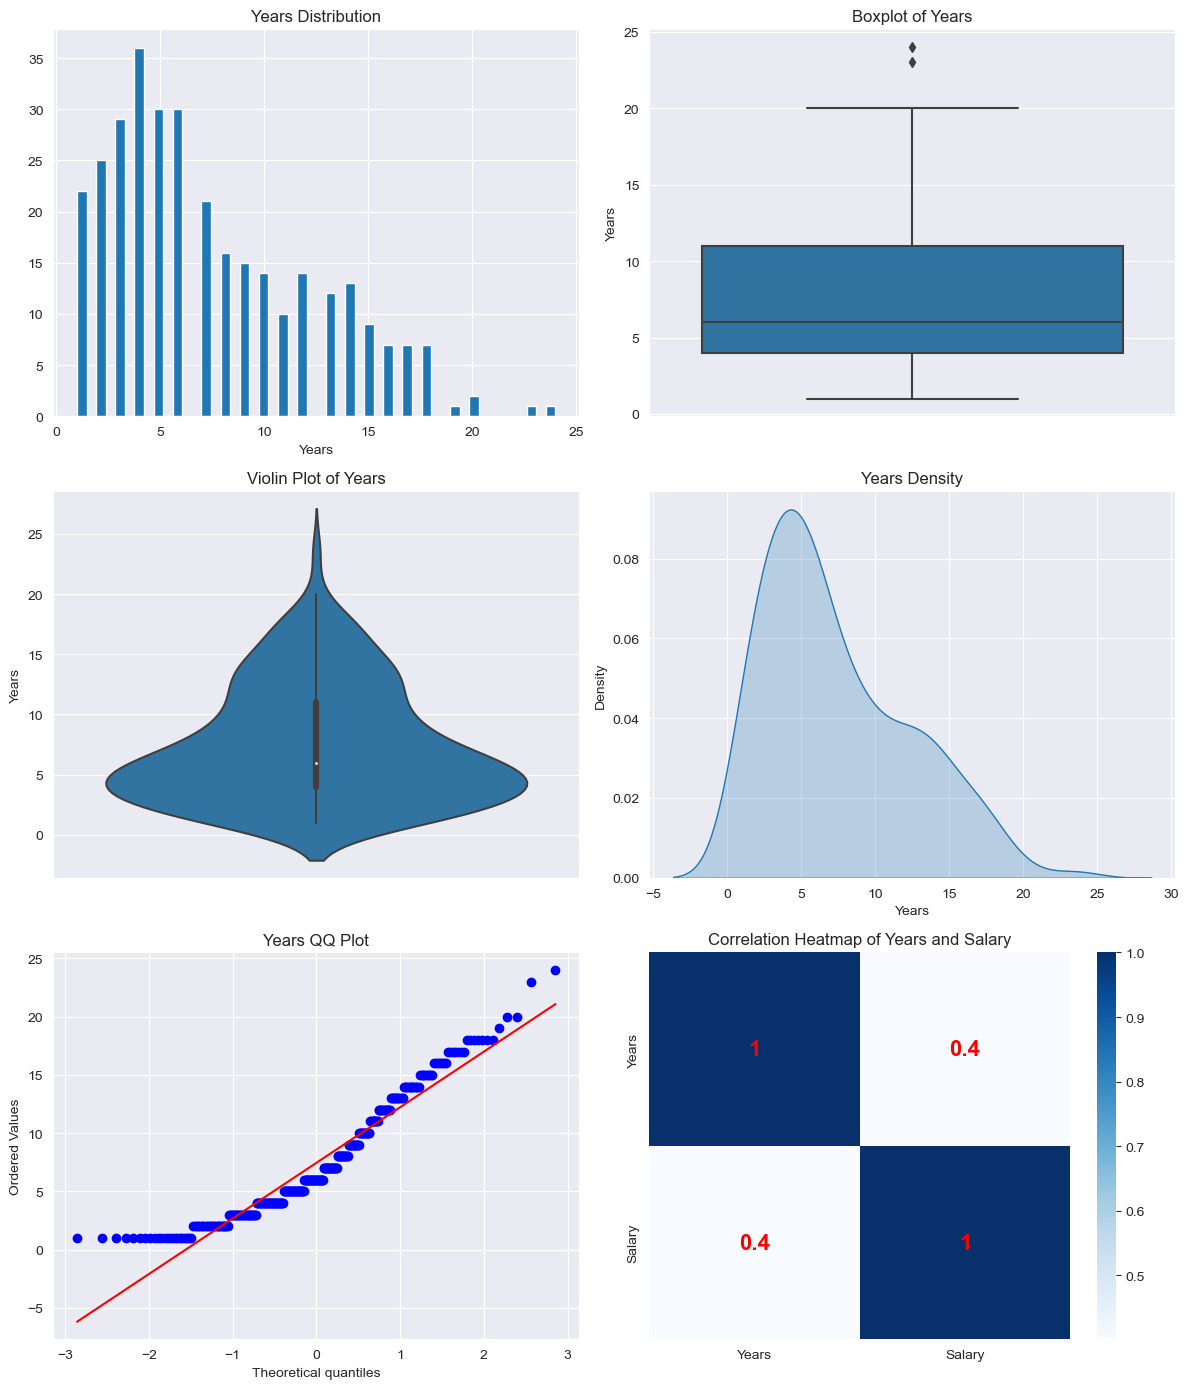

#####################################
count     322.000
mean     2648.683
std      2324.206
min        19.000
5%        216.500
10%       342.200
20%       667.600
30%       963.400
40%      1402.200
50%      1928.000
60%      2654.000
70%      3365.000
80%      4483.000
90%      6123.400
95%      7125.600
99%      8749.970
max     14053.000
Name: CAtBat, dtype: float64
Skewness: 1.23
Kurtosis: 1.50


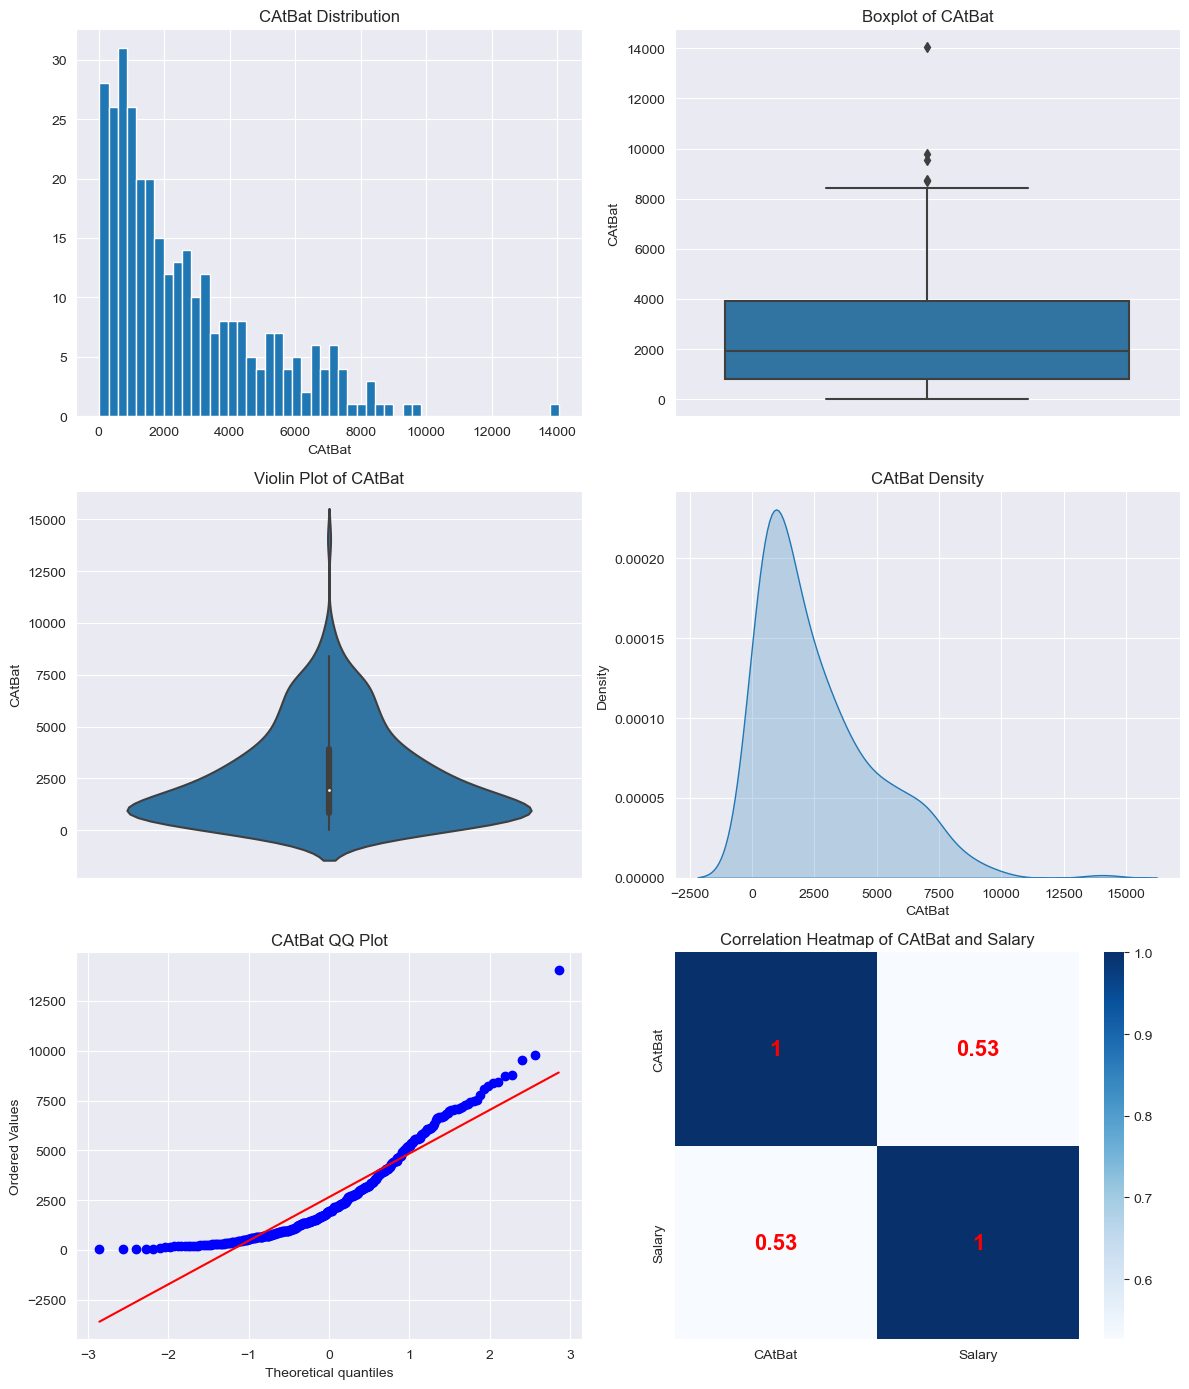

#####################################
count    322.000
mean     717.571
std      654.473
min        4.000
5%        54.000
10%       86.000
20%      164.600
30%      238.000
40%      355.800
50%      508.000
60%      708.200
70%      911.100
80%     1229.200
90%     1659.600
95%     2017.150
99%     2500.340
max     4256.000
Name: CHits, dtype: float64
Skewness: 1.36
Kurtosis: 2.35


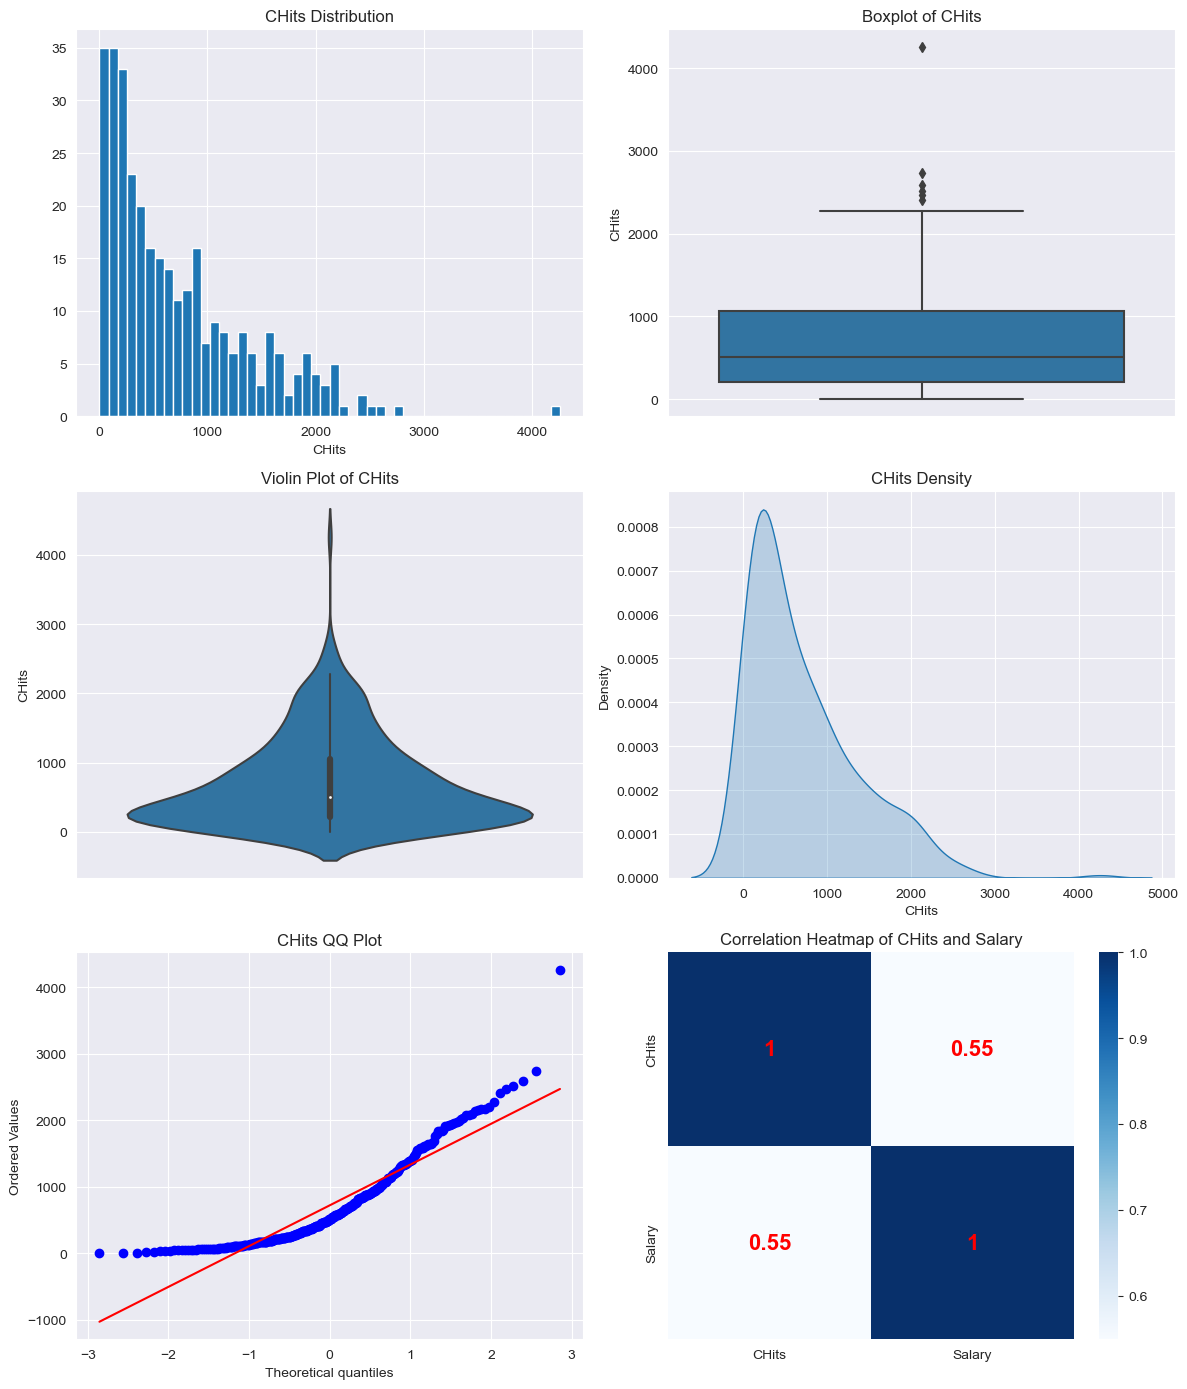

#####################################
count   322.000
mean     69.491
std      86.266
min       0.000
5%        2.000
10%       4.000
20%      10.200
30%      16.300
40%      27.400
50%      37.500
60%      51.200
70%      72.400
80%     103.800
90%     194.900
95%     265.650
99%     373.120
max     548.000
Name: CHmRun, dtype: float64
Skewness: 2.16
Kurtosis: 5.32


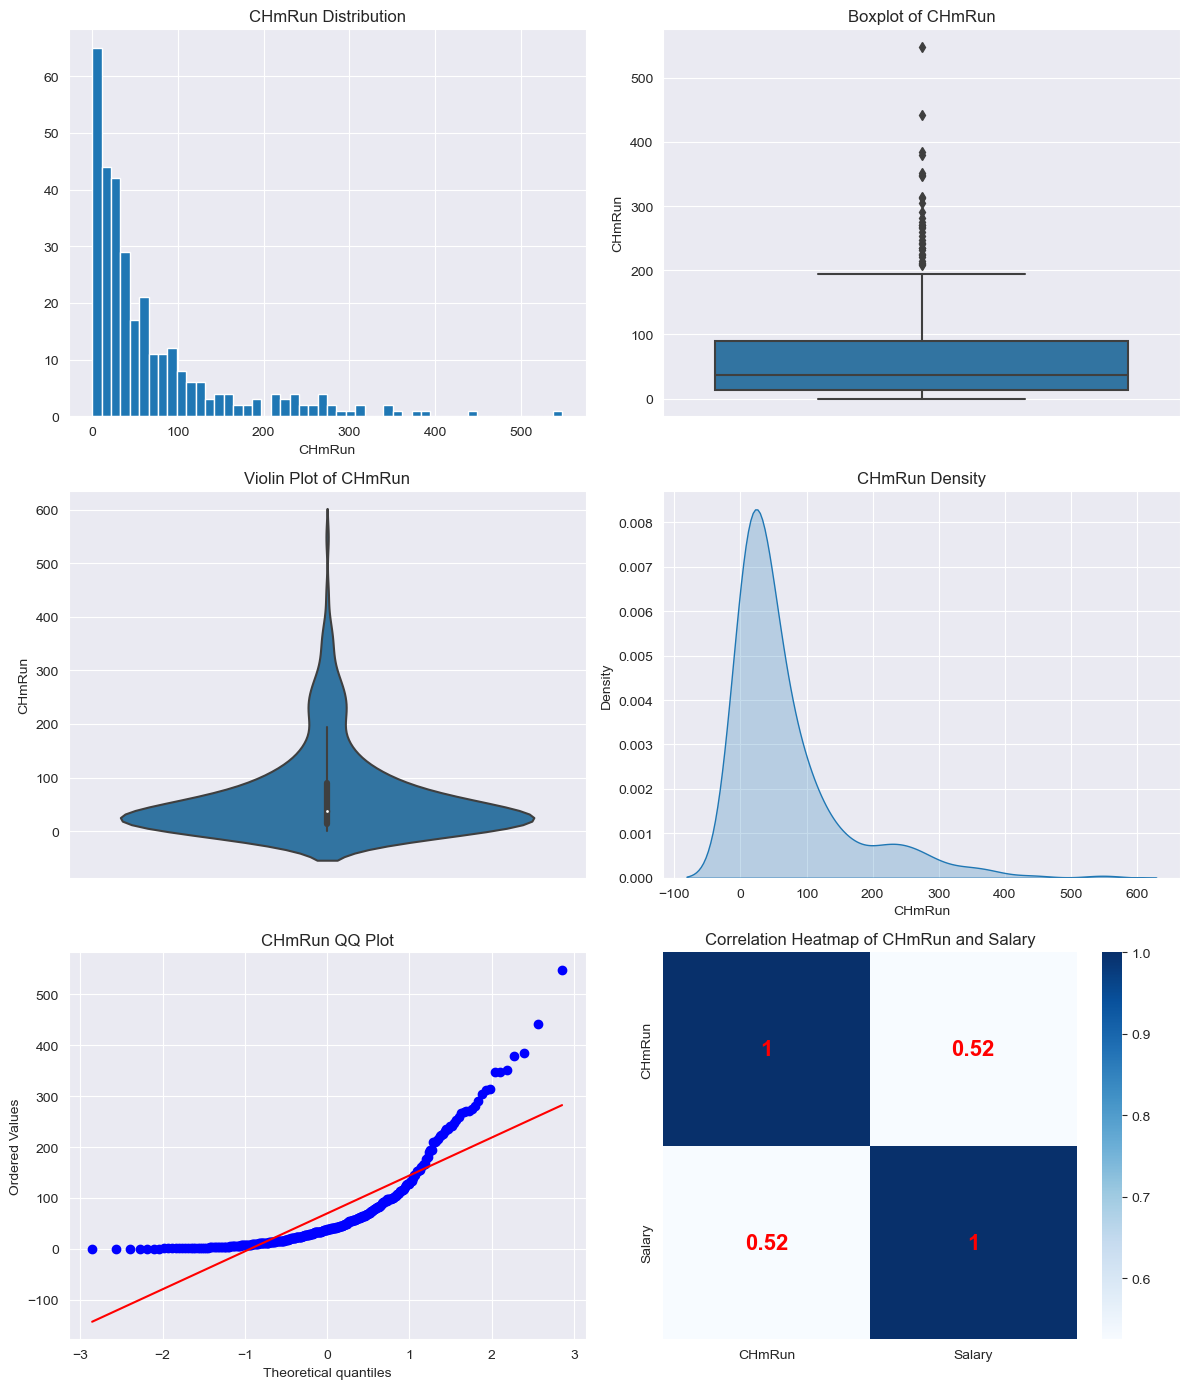

#####################################
count    322.000
mean     358.795
std      334.106
min        1.000
5%        27.000
10%       38.100
20%       80.400
30%      117.300
40%      181.000
50%      247.000
60%      333.000
70%      443.400
80%      627.200
90%      895.700
95%     1032.300
99%     1174.370
max     2165.000
Name: CRuns, dtype: float64
Skewness: 1.39
Kurtosis: 2.40


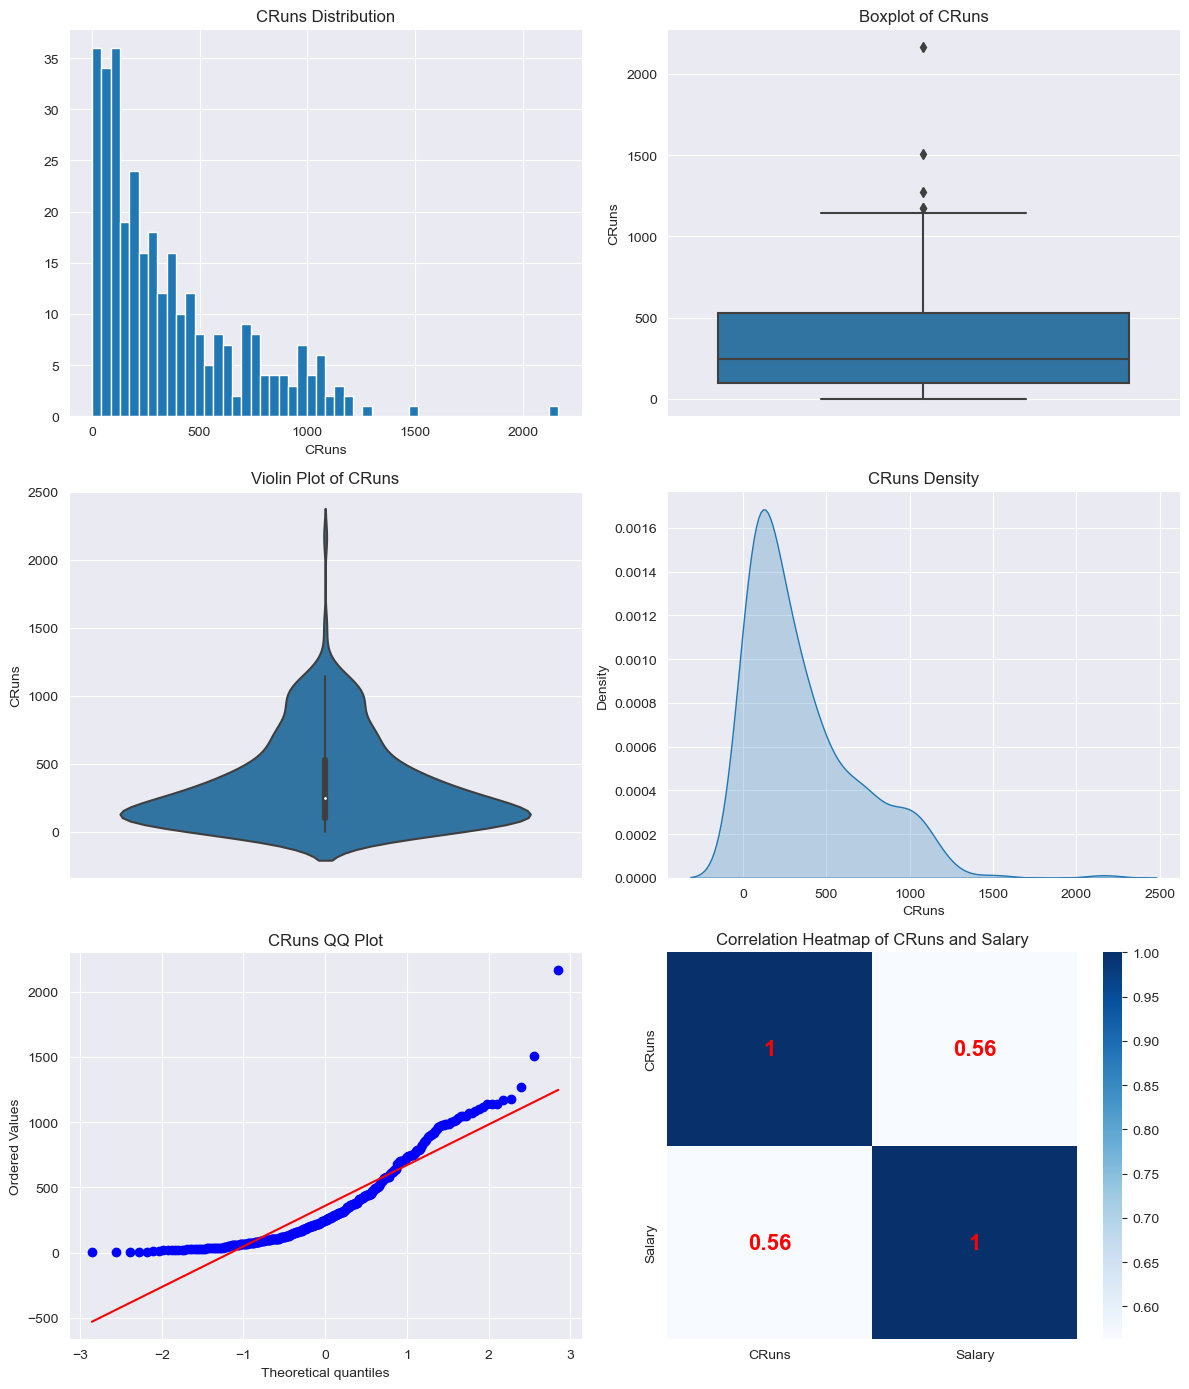

#####################################
count    322.000
mean     330.118
std      333.220
min        0.000
5%        22.050
10%       34.100
20%       70.200
30%      106.300
40%      149.000
50%      220.500
60%      303.600
70%      379.100
80%      496.200
90%      861.600
95%     1071.750
99%     1310.850
max     1659.000
Name: CRBI, dtype: float64
Skewness: 1.53
Kurtosis: 1.96


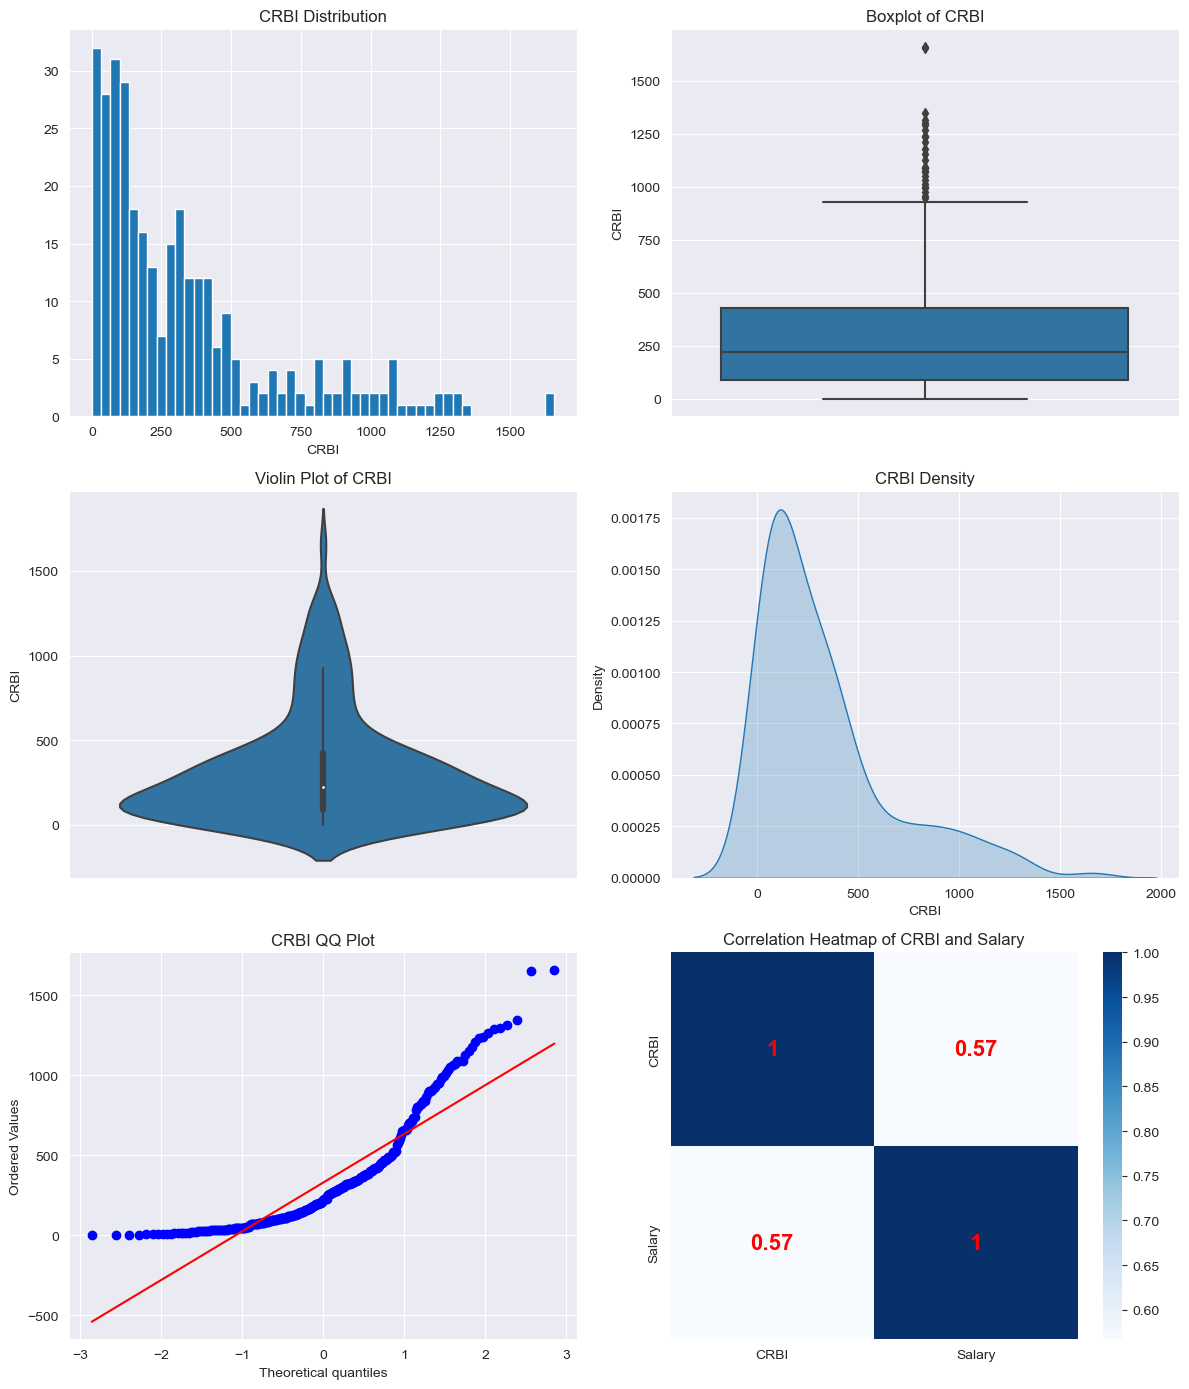

#####################################
count    322.000
mean     260.239
std      267.058
min        0.000
5%        15.050
10%       30.100
20%       55.000
30%       82.000
40%      117.400
50%      170.500
60%      226.600
70%      300.700
80%      421.000
90%      643.900
95%      817.600
99%     1139.140
max     1566.000
Name: CWalks, dtype: float64
Skewness: 1.75
Kurtosis: 3.49


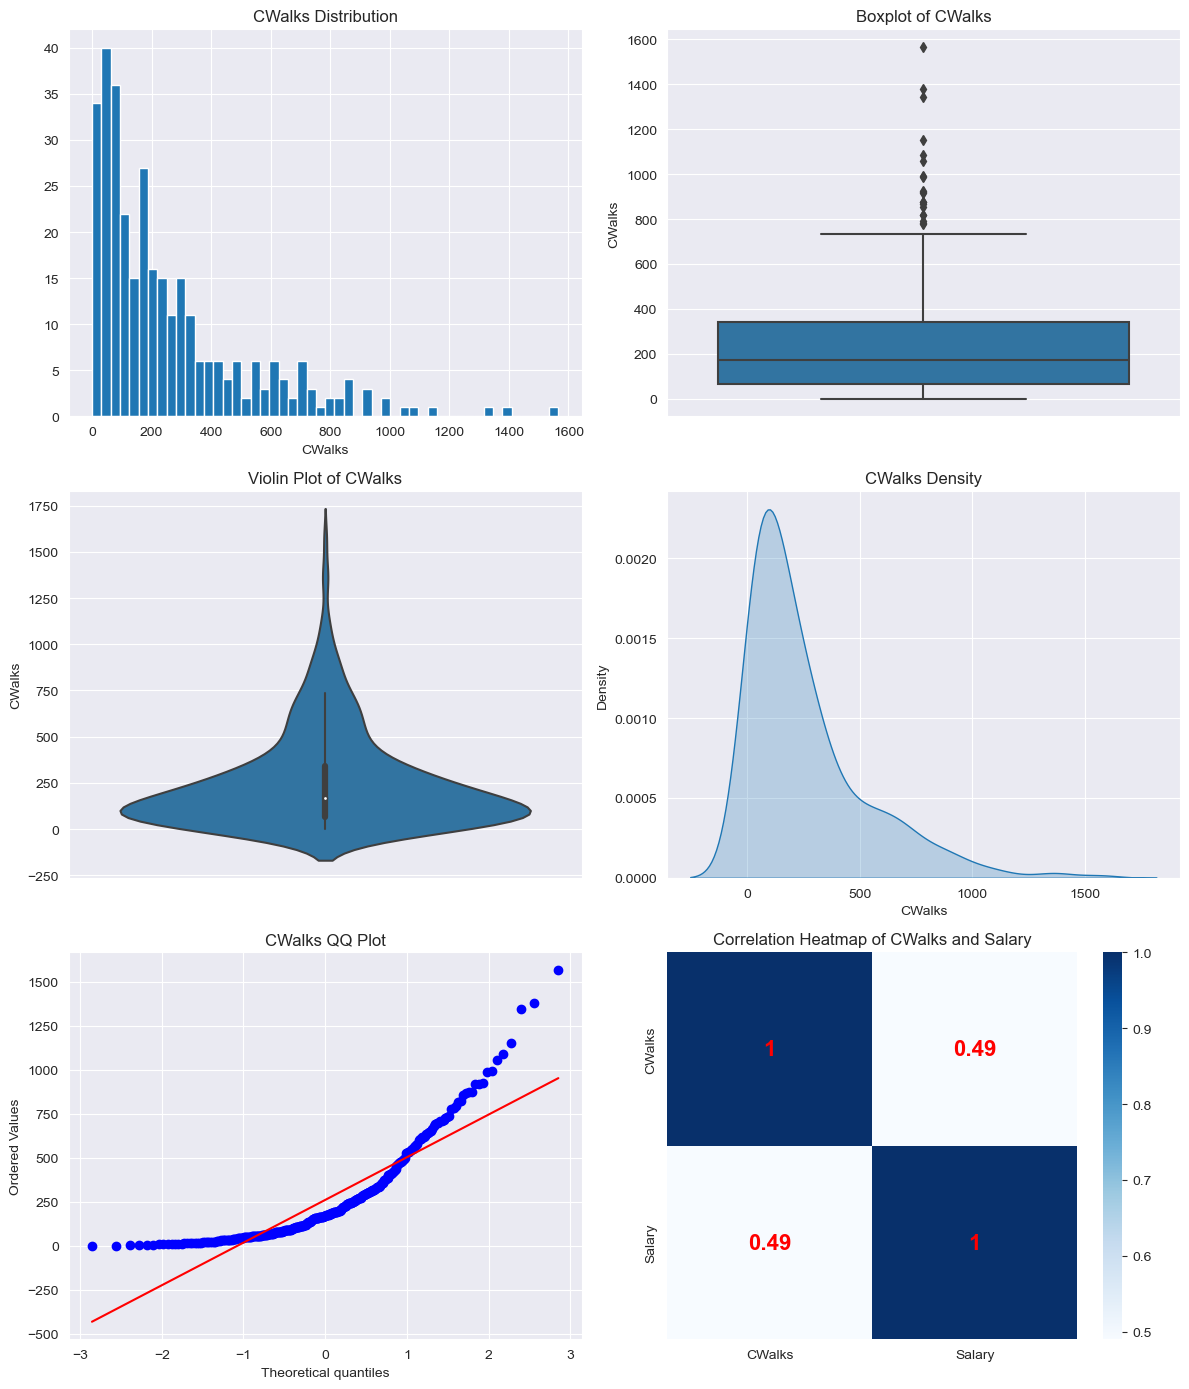

#####################################
count    322.000
mean     288.938
std      280.705
min        0.000
5%        33.200
10%       62.200
20%       99.600
30%      132.000
40%      167.000
50%      212.000
60%      257.400
70%      303.000
80%      365.800
90%      685.600
95%      910.650
99%     1301.190
max     1378.000
Name: PutOuts, dtype: float64
Skewness: 2.06
Kurtosis: 4.22


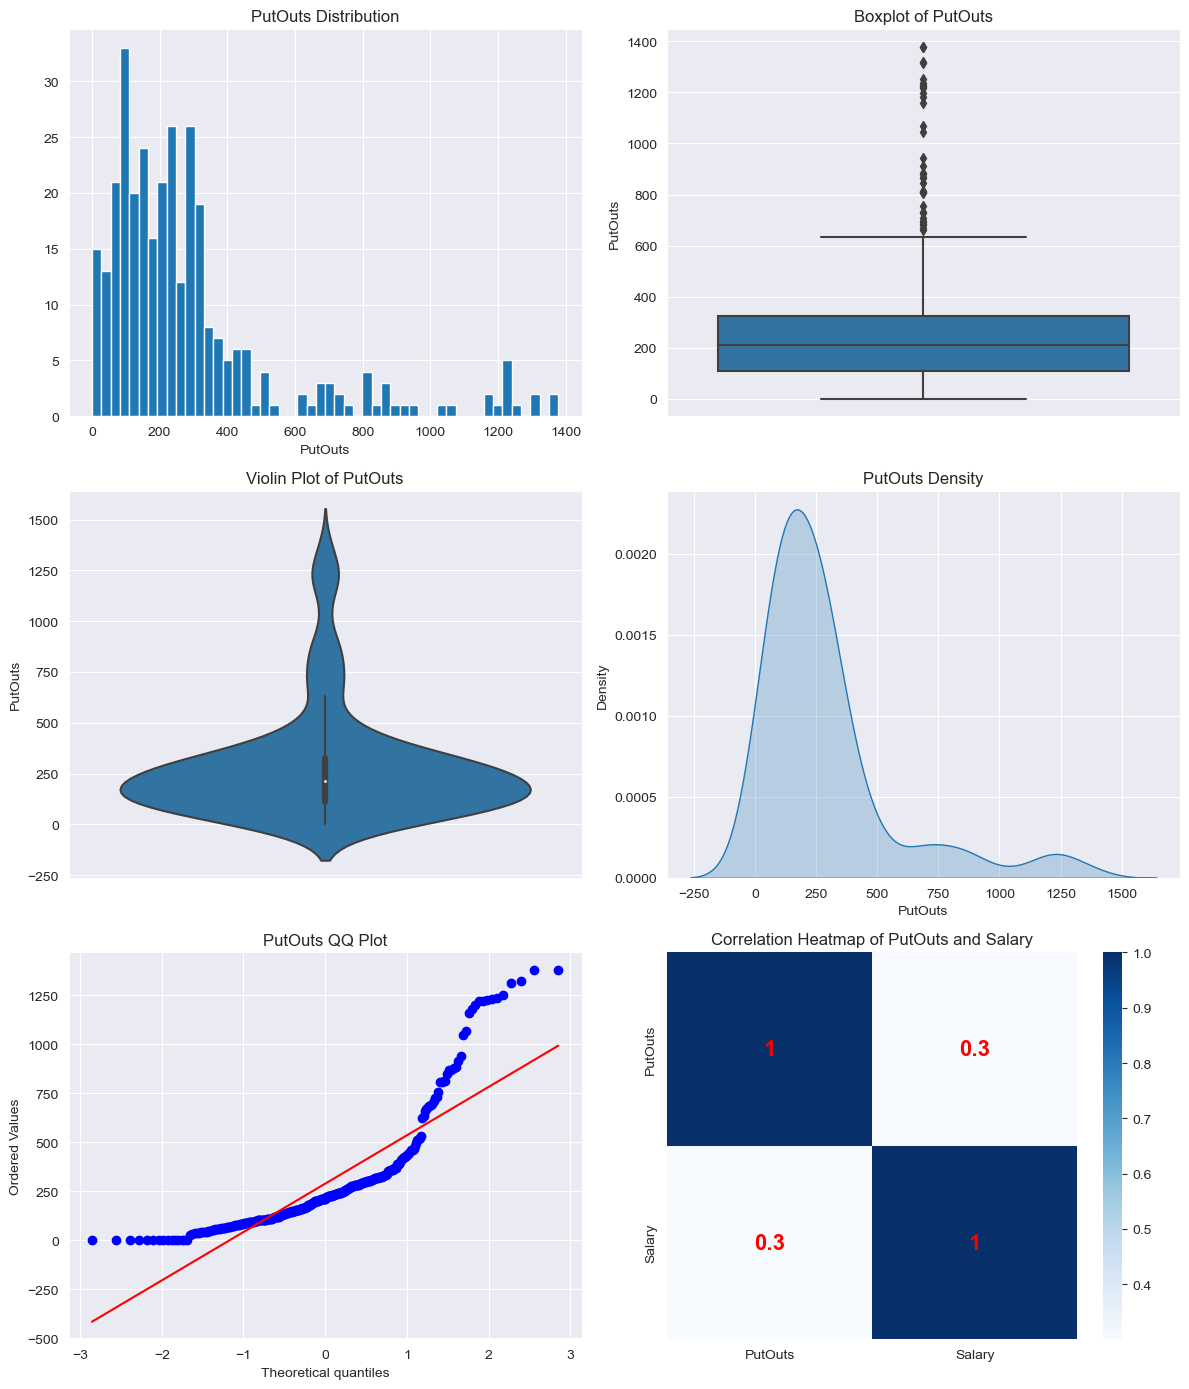

#####################################
count   322.000
mean    106.913
std     136.855
min       0.000
5%        0.000
10%       2.000
20%       5.200
30%       9.000
40%      15.400
50%      39.500
60%      76.800
70%     134.800
80%     210.800
90%     353.300
95%     431.450
99%     478.160
max     492.000
Name: Assists, dtype: float64
Skewness: 1.36
Kurtosis: 0.68


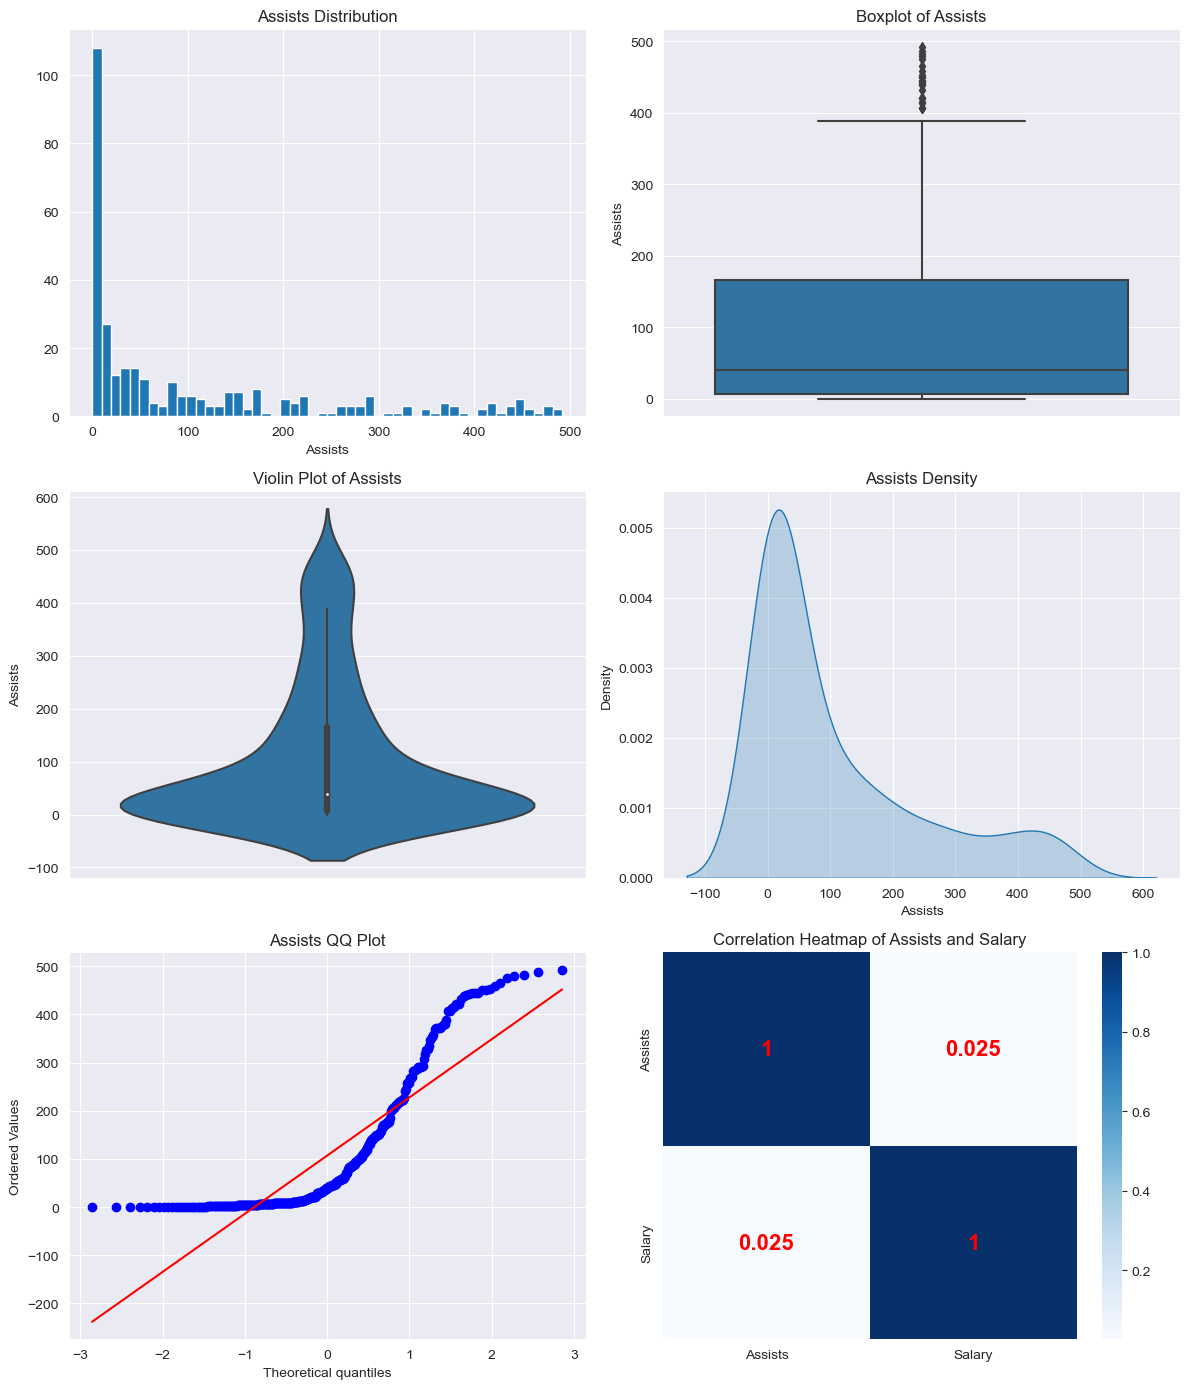

#####################################
count   322.000
mean      8.040
std       6.368
min       0.000
5%        0.000
10%       1.000
20%       3.000
30%       4.000
40%       5.000
50%       6.000
60%       8.000
70%      10.000
80%      13.000
90%      17.000
95%      20.000
99%      25.790
max      32.000
Name: Errors, dtype: float64
Skewness: 1.06
Kurtosis: 0.69


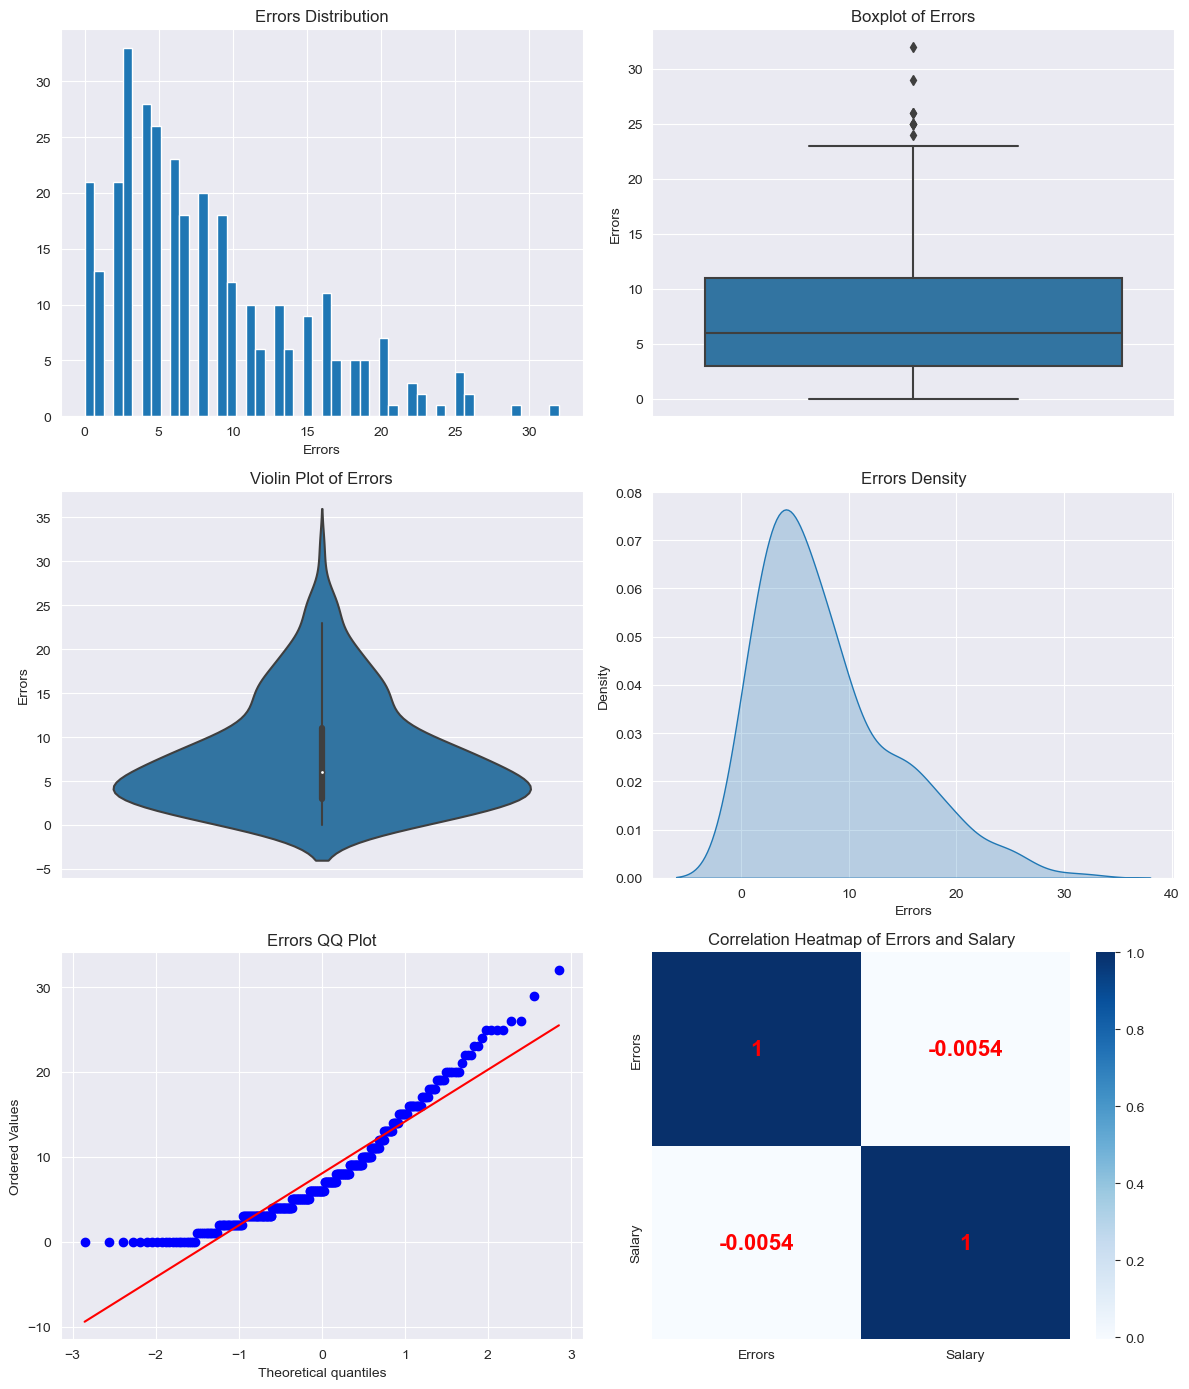

#####################################
count    263.000
mean     535.926
std      451.119
min       67.500
5%        86.600
10%      100.000
20%      155.000
30%      221.000
40%      300.000
50%      425.000
60%      538.000
70%      700.000
80%      809.000
90%     1048.667
95%     1346.000
99%     2032.887
max     2460.000
Name: Salary, dtype: float64
Skewness: 1.59
Kurtosis: 3.06


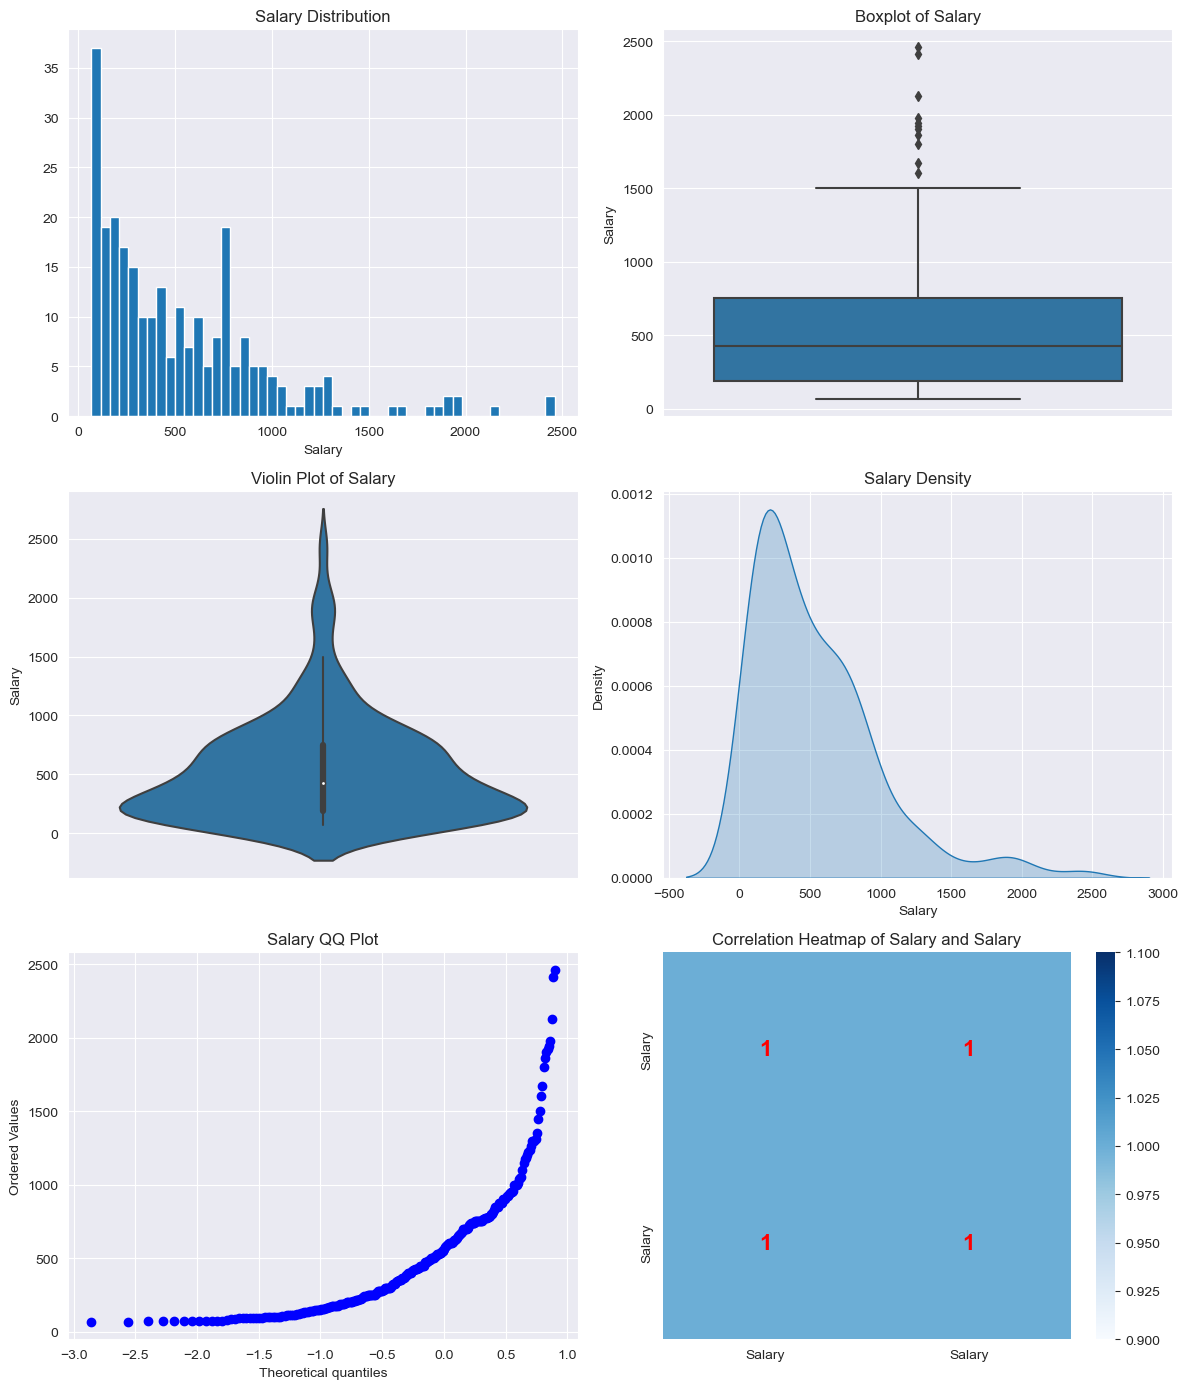

#####################################


In [24]:
for col in num_cols:
    num_summary(df, col, plot=True, target_col="Salary")

# Analysis of Target Variable

In [25]:
def target_summary_with_cat(dataframe, target, categorical_col):

    print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean()}), end="\n\n\n")

In [27]:
for col in cat_cols:
    target_summary_with_cat(df, "Salary", col)

        TARGET_MEAN
League             
A           542.000
N           529.118


          TARGET_MEAN
Division             
E             624.271
W             450.877


           TARGET_MEAN
NewLeague             
A              537.113
N              534.554




In [29]:
df["Salary"].unique()

array([     nan,  475.   ,  480.   ,  500.   ,   91.5  ,  750.   ,
         70.   ,  100.   ,   75.   , 1100.   ,  517.143,  512.5  ,
        550.   ,  700.   ,  240.   ,  775.   ,  175.   ,  135.   ,
        115.   ,  600.   ,  776.667,  765.   ,  708.333,  625.   ,
        900.   ,  110.   ,  612.5  ,  300.   ,  850.   ,   90.   ,
         67.5  ,  180.   ,  305.   ,  215.   ,  247.5  ,  815.   ,
        875.   , 1200.   ,  675.   ,  415.   ,  340.   ,  416.667,
       1350.   ,  275.   ,  230.   ,  225.   ,  950.   ,  105.   ,
        320.   ,  535.   ,  933.333,  210.   ,  325.   ,  450.   ,
       1975.   , 1900.   , 1041.667,  260.   ,  431.5  , 1220.   ,
        145.   ,  595.   , 1861.46 ,  490.   , 2460.   ,  375.   ,
       1175.   , 1500.   ,  385.   , 1925.571,  155.   ,  362.5  ,
        733.333,  200.   ,  400.   ,  737.5  ,  662.5  ,  297.5  ,
         87.5  , 1237.5  ,  430.   ,  165.   ,  250.   , 1300.   ,
        773.333, 1008.333,  365.   ,   95.   ,  277.5  ,   80.

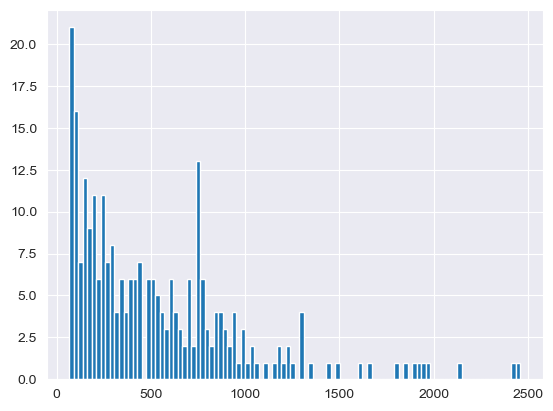

In [30]:
df["Salary"].hist(bins=100)
plt.show(block=True)

# Analysis of Correlation

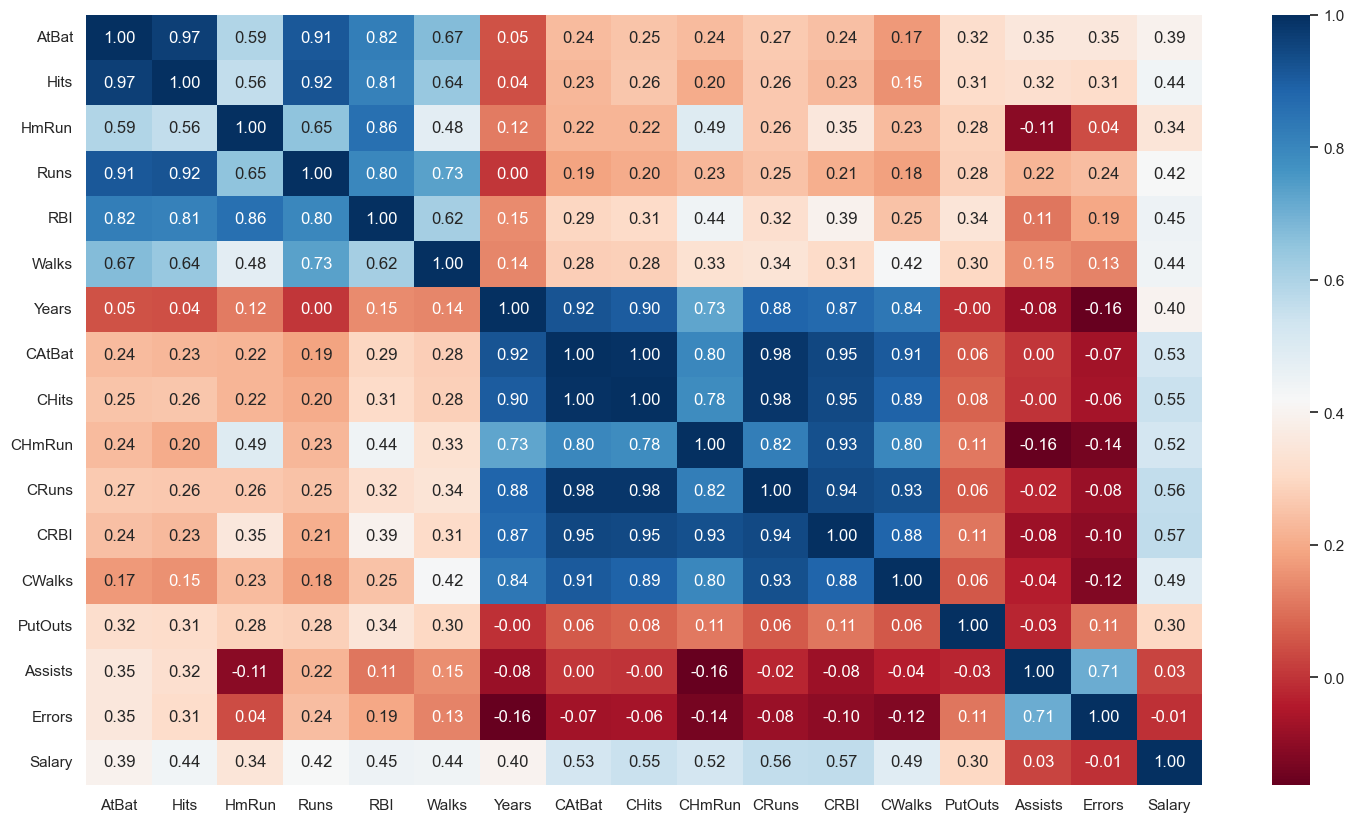

In [35]:
corr = df[num_cols].corr()
corr
sns.set(rc={'figure.figsize': (18, 10)})
sns.heatmap(corr, cmap="RdBu", annot=True, fmt=".2f")
plt.show()

# ADVANCED FUNCTIONAL EDA

- 1. Outliers (Aykırı Değerler)
- 2. Missing Values (Eksik Değerler)
- 3. Feature Extraction (Özellik Çıkarımı)
- 4. Encoding (Label Encoding, One-Hot Encoding, Rare Encoding)
- 5. Feature Scaling (Özellik Ölçeklendirme)

# OUTLIERS

In [38]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [39]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [40]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [41]:
for col in num_cols:
    print(col, check_outlier(df, col))

AtBat False
Hits False
HmRun True
Runs True
RBI True
Walks True
Years True
CAtBat True
CHits True
CHmRun True
CRuns True
CRBI True
CWalks True
PutOuts True
Assists True
Errors True
Salary True


In [42]:
for col in num_cols:
    if check_outlier(df, col):
        replace_with_thresholds(df, col)

In [43]:
for col in num_cols:
    print(col, check_outlier(df, col))

AtBat False
Hits False
HmRun False
Runs False
RBI False
Walks False
Years False
CAtBat False
CHits False
CHmRun False
CRuns False
CRBI False
CWalks False
PutOuts False
Assists False
Errors False
Salary False


In [44]:
low_limit, up_limit = outlier_thresholds(df, col)
print(f"{col}: Low Limit = {low_limit}, Up Limit = {up_limit}")

Salary: Low Limit = -650.0, Up Limit = 1590.0


# MISSING VALUES

In [45]:
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")
    if na_name:
        return na_columns

In [46]:
missing_values_table(df)

        n_miss  ratio
Salary      59 18.320


In [47]:
df.dropna(inplace=True)

In [48]:
missing_values_table(df)

Empty DataFrame
Columns: [n_miss, ratio]
Index: []


# FEATURE EXTRACTION

In [49]:
new_num_cols=[col for col in num_cols if col!="Salary"]

In [50]:
new_num_cols

['AtBat',
 'Hits',
 'HmRun',
 'Runs',
 'RBI',
 'Walks',
 'Years',
 'CAtBat',
 'CHits',
 'CHmRun',
 'CRuns',
 'CRBI',
 'CWalks',
 'PutOuts',
 'Assists',
 'Errors']

In [51]:
df[new_num_cols]=df[new_num_cols]+0.0000000001

In [52]:
df['NEW_Hits'] = df['Hits'] / df['CHits'] + df['Hits']
df['NEW_RBI'] = df['RBI'] / df['CRBI']
df['NEW_Walks'] = df['Walks'] / df['CWalks']
df['NEW_PutOuts'] = df['PutOuts'] * df['Years']
df["Hits_Success"] = (df["Hits"] / df["AtBat"]) * 100
df["NEW_CRBI*CATBAT"] = df['CRBI'] * df['CAtBat']
df["NEW_RBI"] = df["RBI"] / df["CRBI"]
df["NEW_Chits"] = df["CHits"] / df["Years"]
df["NEW_CHmRun"] = df["CHmRun"] * df["Years"]
df["NEW_CRuns"] = df["CRuns"] / df["Years"]
df["NEW_Chits"] = df["CHits"] * df["Years"]
df["NEW_RW"] = df["RBI"] * df["Walks"]
df["NEW_RBWALK"] = df["RBI"] / df["Walks"]
df["NEW_CH_CB"] = df["CHits"] / df["CAtBat"]
df["NEW_CHm_CAT"] = df["CHmRun"] / df["CAtBat"]
df['NEW_Diff_Atbat'] = df['AtBat'] - (df['CAtBat'] / df['Years'])
df['NEW_Diff_Hits'] = df['Hits'] - (df['CHits'] / df['Years'])
df['NEW_Diff_HmRun'] = df['HmRun'] - (df['CHmRun'] / df['Years'])
df['NEW_Diff_Runs'] = df['Runs'] - (df['CRuns'] / df['Years'])
df['NEW_Diff_RBI'] = df['RBI'] - (df['CRBI'] / df['Years'])
df['NEW_Diff_Walks'] = df['Walks'] - (df['CWalks'] / df['Years'])

**AGAIN GRAB_COL_NAMES**

In [53]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)
print("#############")
print(f"Cat_Cols : {cat_cols}")
print("#############")
print(f"Num_Cols : {num_cols}")
print("#############")
print(f"Cat_But_Car : {cat_but_car}")

Observations: 263
Variables: 39
cat_cols: 3
num_cols: 36
cat_but_car: 0
num_but_cat: 0
#############
Cat_Cols : ['League', 'Division', 'NewLeague']
#############
Num_Cols : ['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat', 'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists', 'Errors', 'Salary', 'NEW_Hits', 'NEW_RBI', 'NEW_Walks', 'NEW_PutOuts', 'Hits_Success', 'NEW_CRBI*CATBAT', 'NEW_Chits', 'NEW_CHmRun', 'NEW_CRuns', 'NEW_RW', 'NEW_RBWALK', 'NEW_CH_CB', 'NEW_CHm_CAT', 'NEW_Diff_Atbat', 'NEW_Diff_Hits', 'NEW_Diff_HmRun', 'NEW_Diff_Runs', 'NEW_Diff_RBI', 'NEW_Diff_Walks']
#############
Cat_But_Car : []


# ONE-HOT ENCODING


In [54]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

In [55]:
df = one_hot_encoder(df, cat_cols, drop_first=True)
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,NEW_Hits,NEW_RBI,NEW_Walks,NEW_PutOuts,Hits_Success,NEW_CRBI*CATBAT,NEW_Chits,NEW_CHmRun,NEW_CRuns,NEW_RW,NEW_RBWALK,NEW_CH_CB,NEW_CHm_CAT,NEW_Diff_Atbat,NEW_Diff_Hits,NEW_Diff_HmRun,NEW_Diff_Runs,NEW_Diff_RBI,NEW_Diff_Walks,League_N,Division_W,NewLeague_N
1,315.000,81.000,7.000,24.000,38.000,39.000,14.000,3449.000,835.000,69.000,321.000,414.000,375.000,632.000,43.000,10.000,475.000,81.097,0.092,0.104,8848.000,25.714,1427886.000,11690.000,966.000,22.929,1482.000,0.974,0.242,0.020,68.643,21.357,2.071,1.071,8.429,12.214,True,True,True
2,479.000,130.000,18.000,66.000,72.000,76.000,3.000,1624.000,457.000,63.000,224.000,266.000,263.000,648.625,82.000,14.000,480.000,130.284,0.271,0.289,1945.875,27.140,431984.000,1371.000,189.000,74.667,5472.000,0.947,0.281,0.039,-62.333,-22.333,-3.000,-8.667,-16.667,-11.667,False,True,False
3,496.000,141.000,20.000,65.000,78.000,37.000,11.000,5628.000,1575.000,204.000,828.000,838.000,354.000,200.000,11.000,3.000,500.000,141.090,0.093,0.105,2200.000,28.427,4716264.000,17325.000,2244.000,75.273,2886.000,2.108,0.280,0.036,-15.636,-2.182,1.455,-10.273,1.818,4.818,True,False,True
4,321.000,87.000,10.000,39.000,42.000,30.000,2.000,396.000,101.000,12.000,48.000,46.000,33.000,648.625,40.000,4.000,91.500,87.861,0.913,0.909,1297.250,27.103,18216.000,202.000,24.000,24.000,1260.000,1.400,0.255,0.030,123.000,36.500,4.000,15.000,19.000,13.500,True,False,True
5,594.000,169.000,4.000,74.000,51.000,35.000,11.000,4408.000,1133.000,19.000,501.000,336.000,194.000,282.000,404.500,23.000,750.000,169.149,0.152,0.180,3102.000,28.451,1481088.000,12463.000,209.000,45.545,1785.000,1.457,0.257,0.004,193.273,66.000,2.273,28.455,20.455,17.364,False,True,False


In [56]:
df = df.applymap(lambda x: 1 if x is True else (0 if x is False else x))

In [57]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,NEW_Hits,NEW_RBI,NEW_Walks,NEW_PutOuts,Hits_Success,NEW_CRBI*CATBAT,NEW_Chits,NEW_CHmRun,NEW_CRuns,NEW_RW,NEW_RBWALK,NEW_CH_CB,NEW_CHm_CAT,NEW_Diff_Atbat,NEW_Diff_Hits,NEW_Diff_HmRun,NEW_Diff_Runs,NEW_Diff_RBI,NEW_Diff_Walks,League_N,Division_W,NewLeague_N
1,315.000,81.000,7.000,24.000,38.000,39.000,14.000,3449.000,835.000,69.000,321.000,414.000,375.000,632.000,43.000,10.000,475.000,81.097,0.092,0.104,8848.000,25.714,1427886.000,11690.000,966.000,22.929,1482.000,0.974,0.242,0.020,68.643,21.357,2.071,1.071,8.429,12.214,1,1,1
2,479.000,130.000,18.000,66.000,72.000,76.000,3.000,1624.000,457.000,63.000,224.000,266.000,263.000,648.625,82.000,14.000,480.000,130.284,0.271,0.289,1945.875,27.140,431984.000,1371.000,189.000,74.667,5472.000,0.947,0.281,0.039,-62.333,-22.333,-3.000,-8.667,-16.667,-11.667,0,1,0
3,496.000,141.000,20.000,65.000,78.000,37.000,11.000,5628.000,1575.000,204.000,828.000,838.000,354.000,200.000,11.000,3.000,500.000,141.090,0.093,0.105,2200.000,28.427,4716264.000,17325.000,2244.000,75.273,2886.000,2.108,0.280,0.036,-15.636,-2.182,1.455,-10.273,1.818,4.818,1,0,1
4,321.000,87.000,10.000,39.000,42.000,30.000,2.000,396.000,101.000,12.000,48.000,46.000,33.000,648.625,40.000,4.000,91.500,87.861,0.913,0.909,1297.250,27.103,18216.000,202.000,24.000,24.000,1260.000,1.400,0.255,0.030,123.000,36.500,4.000,15.000,19.000,13.500,1,0,1
5,594.000,169.000,4.000,74.000,51.000,35.000,11.000,4408.000,1133.000,19.000,501.000,336.000,194.000,282.000,404.500,23.000,750.000,169.149,0.152,0.180,3102.000,28.451,1481088.000,12463.000,209.000,45.545,1785.000,1.457,0.257,0.004,193.273,66.000,2.273,28.455,20.455,17.364,0,1,0


# FEATURE SCALING

In [58]:
num_cols = [col for col in num_cols if col not in ["Salary"]]

In [59]:
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,NEW_Hits,NEW_RBI,NEW_Walks,NEW_PutOuts,Hits_Success,NEW_CRBI*CATBAT,NEW_Chits,NEW_CHmRun,NEW_CRuns,NEW_RW,NEW_RBWALK,NEW_CH_CB,NEW_CHm_CAT,NEW_Diff_Atbat,NEW_Diff_Hits,NEW_Diff_HmRun,NEW_Diff_Runs,NEW_Diff_RBI,NEW_Diff_Walks,League_N,Division_W,NewLeague_N
1,-0.603,-0.596,-0.530,-1.207,-0.522,-0.097,1.409,0.373,0.201,0.110,-0.113,0.366,0.592,2.072,-0.528,0.242,475.000,-0.601,-0.836,-0.793,3.327,-0.168,0.011,0.371,0.302,-1.063,-0.466,-0.580,-0.873,-0.273,-0.004,0.093,-0.280,-0.473,-0.213,0.155,1,1,1
2,0.513,0.492,0.738,0.442,0.795,1.615,-0.905,-0.461,-0.418,0.012,-0.425,-0.169,0.081,2.163,-0.242,0.877,480.000,0.492,-0.230,-0.149,0.056,0.277,-0.468,-0.617,-0.502,1.419,1.488,-0.613,0.805,1.012,-1.149,-1.229,-1.283,-1.010,-1.676,-1.501,0,1,0
3,0.628,0.736,0.969,0.403,1.027,-0.189,0.778,1.369,1.413,2.305,1.518,1.898,0.496,-0.301,-0.762,-0.871,500.000,0.732,-0.831,-0.791,0.176,0.679,1.594,0.910,1.624,1.448,0.221,0.782,0.739,0.838,-0.741,-0.619,-0.402,-1.098,-0.599,-0.358,1,0,1
4,-0.562,-0.462,-0.184,-0.618,-0.367,-0.513,-1.115,-1.022,-1.002,-0.817,-0.991,-0.964,-0.969,2.163,-0.550,-0.712,91.500,-0.451,1.943,2.008,-0.252,0.265,-0.668,-0.729,-0.673,-1.011,-0.575,-0.069,-0.320,0.432,0.471,0.551,0.101,0.295,0.403,0.244,1,0,1
5,1.295,1.358,-0.876,0.757,-0.019,-0.282,0.778,0.812,0.689,-0.704,0.466,0.084,-0.234,0.150,2.118,2.307,750.000,1.355,-0.633,-0.527,0.604,0.686,0.037,0.445,-0.481,0.022,-0.318,-0.000,-0.235,-1.346,1.086,1.443,-0.240,1.036,0.488,0.512,0,1,0


# BASE MODELS

In [60]:
X = df.drop(["Salary"], axis=1)
y = df["Salary"]

In [62]:
y.head()

1   475.000
2   480.000
3   500.000
4    91.500
5   750.000
Name: Salary, dtype: float64

In [63]:
X.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,NEW_Hits,NEW_RBI,NEW_Walks,NEW_PutOuts,Hits_Success,NEW_CRBI*CATBAT,NEW_Chits,NEW_CHmRun,NEW_CRuns,NEW_RW,NEW_RBWALK,NEW_CH_CB,NEW_CHm_CAT,NEW_Diff_Atbat,NEW_Diff_Hits,NEW_Diff_HmRun,NEW_Diff_Runs,NEW_Diff_RBI,NEW_Diff_Walks,League_N,Division_W,NewLeague_N
1,-0.603,-0.596,-0.530,-1.207,-0.522,-0.097,1.409,0.373,0.201,0.110,-0.113,0.366,0.592,2.072,-0.528,0.242,-0.601,-0.836,-0.793,3.327,-0.168,0.011,0.371,0.302,-1.063,-0.466,-0.580,-0.873,-0.273,-0.004,0.093,-0.280,-0.473,-0.213,0.155,1,1,1
2,0.513,0.492,0.738,0.442,0.795,1.615,-0.905,-0.461,-0.418,0.012,-0.425,-0.169,0.081,2.163,-0.242,0.877,0.492,-0.230,-0.149,0.056,0.277,-0.468,-0.617,-0.502,1.419,1.488,-0.613,0.805,1.012,-1.149,-1.229,-1.283,-1.010,-1.676,-1.501,0,1,0
3,0.628,0.736,0.969,0.403,1.027,-0.189,0.778,1.369,1.413,2.305,1.518,1.898,0.496,-0.301,-0.762,-0.871,0.732,-0.831,-0.791,0.176,0.679,1.594,0.910,1.624,1.448,0.221,0.782,0.739,0.838,-0.741,-0.619,-0.402,-1.098,-0.599,-0.358,1,0,1
4,-0.562,-0.462,-0.184,-0.618,-0.367,-0.513,-1.115,-1.022,-1.002,-0.817,-0.991,-0.964,-0.969,2.163,-0.550,-0.712,-0.451,1.943,2.008,-0.252,0.265,-0.668,-0.729,-0.673,-1.011,-0.575,-0.069,-0.320,0.432,0.471,0.551,0.101,0.295,0.403,0.244,1,0,1
5,1.295,1.358,-0.876,0.757,-0.019,-0.282,0.778,0.812,0.689,-0.704,0.466,0.084,-0.234,0.150,2.118,2.307,1.355,-0.633,-0.527,0.604,0.686,0.037,0.445,-0.481,0.022,-0.318,-0.000,-0.235,-1.346,1.086,1.443,-0.240,1.036,0.488,0.512,0,1,0


In [66]:
models = [('LR', LinearRegression()),
          ("Ridge", Ridge()),
          ("Lasso", Lasso()),
          ("ElasticNet", ElasticNet()),
          ('KNN', KNeighborsRegressor()),
          ('CART', DecisionTreeRegressor()),
          ('RF', RandomForestRegressor()),
          ('SVR', SVR()),
          ('GBM', GradientBoostingRegressor()),
          ("XGBoost", XGBRegressor(objective='reg:squarederror')),
          ("LightGBM", LGBMRegressor(verbosity=-1)),
          ("CatBoost", CatBoostRegressor(verbose=False))]

In [67]:
for name, regressor in models:
    rmse = np.mean(np.sqrt(-cross_val_score(regressor, X, y, cv=10, scoring="neg_mean_squared_error")))
    print(f"RMSE: {round(rmse, 4)} ({name}) ")

RMSE: 236.0151 (LR) 
RMSE: 232.0914 (Ridge) 
RMSE: 230.1802 (Lasso) 
RMSE: 256.2534 (ElasticNet) 
RMSE: 253.4936 (KNN) 
RMSE: 300.4678 (CART) 
RMSE: 213.4595 (RF) 
RMSE: 398.3709 (SVR) 
RMSE: 201.1677 (GBM) 
RMSE: 217.7508 (XGBoost) 
RMSE: 228.8917 (LightGBM) 
RMSE: 216.6573 (CatBoost) 


# RANDOM FORESTS

In [68]:
rf_model = RandomForestRegressor(random_state=17)

In [69]:
rf_params = {"max_depth": [5, 8, 15, None],
             "max_features": [5, 7, "auto"],
             "min_samples_split": [8, 15, 20],
             "n_estimators": [200, 500]}

In [70]:
rf_best_grid = GridSearchCV(rf_model, rf_params, cv=5, n_jobs=-1, verbose=True).fit(X,y)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


/Users/mustafaemircan/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
120 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/mustafaemircan/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mustafaemircan/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/Users/mustafaemircan/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_

In [71]:
rf_best_grid.best_params_

{'max_depth': 15,
 'max_features': 7,
 'min_samples_split': 8,
 'n_estimators': 200}

In [73]:
rf_final = rf_model.set_params(**rf_best_grid.best_params_, random_state=17).fit(X, y)
rmse = np.mean(np.sqrt(-cross_val_score(rf_final, X, y, cv=10, scoring="neg_mean_squared_error")))
rmse

216.06652578903177

# GBM MODEL

In [74]:
gbm_model = GradientBoostingRegressor(random_state=17)

In [75]:
gbm_params = {"learning_rate": [0.01, 0.1],
              "max_depth": [3, 8],
              "n_estimators": [500, 1000],
              "subsample": [1, 0.5, 0.7]}

In [77]:
gbm_best_grid = GridSearchCV(gbm_model, gbm_params, cv=5, n_jobs=-1, verbose=True).fit(X, y)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [78]:
gbm_best_grid.best_params_

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 1000, 'subsample': 0.7}

In [79]:
gbm_final = gbm_model.set_params(**gbm_best_grid.best_params_, random_state=17).fit(X, y)
rmse = np.mean(np.sqrt(-cross_val_score(gbm_final, X, y, cv=10, scoring="neg_mean_squared_error")))
rmse

204.41758414810752

# LIGHTGBM

In [80]:
lgbm_model =LGBMRegressor(random_state=17, verbosity=-1)

In [81]:
lgbm_params = {"learning_rate": [0.01, 0.1],
                "n_estimators": [300, 500],
                "colsample_bytree": [0.7, 1]}

In [82]:
lgbm_best_grid = GridSearchCV(lgbm_model, lgbm_params, cv=5, n_jobs=-1, verbose=True).fit(X, y)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


In [83]:
lgbm_best_grid.best_params_

{'colsample_bytree': 0.7, 'learning_rate': 0.01, 'n_estimators': 500}

In [87]:
lgbm_final = lgbm_model.set_params(**lgbm_best_grid.best_params_, random_state=17).fit(X, y)
rmse = np.mean(np.sqrt(-cross_val_score(lgbm_final, X, y, cv=10, scoring="neg_mean_squared_error")))
print("LightGBM rmse: ", rmse)

LightGBM rmse:  223.25086589452295


# CATBOOST

In [106]:
catboost_model = CatBoostRegressor(random_state=17, verbose=False)

In [107]:
catboost_params = {"iterations": [200, 500],
                   "learning_rate": [0.01, 0.1],
                   "depth": [3, 6]}

In [108]:
catboost_best_grid = GridSearchCV(catboost_model, catboost_params, cv=5, n_jobs=-1, verbose=True).fit(X, y)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


In [109]:
catboost_best_grid.best_params_

{'depth': 3, 'iterations': 500, 'learning_rate': 0.1}

In [110]:
catboost_final = catboost_model.set_params(**catboost_best_grid.best_params_, random_state=17).fit(X, y)
rmse = np.mean(np.sqrt(-cross_val_score(catboost_final, X, y, cv=10, scoring="neg_mean_squared_error")))
rmse

210.25407496055738

# Automated Hyperparameter Optimization

In [111]:
rf_params = {"max_depth": [5, 8, 15, None],
             "max_features": [5, 7, "auto"],
             "min_samples_split": [8, 15, 20],
             "n_estimators": [200, 500]}

gbm_params = {"learning_rate": [0.01, 0.1],
              "max_depth": [3, 8],
              "n_estimators": [500, 1000],
              "subsample": [1, 0.5, 0.7]}


lightgbm_params = {"learning_rate": [0.01, 0.1],
                   "n_estimators": [300, 500],
                   "colsample_bytree": [0.7, 1]}

catboost_params = {"iterations": [200, 500],
                   "learning_rate": [0.01, 0.1],
                   "depth": [3, 6]}

In [116]:
regressors = [("RF", RandomForestRegressor(), rf_params),
              ('GBM', GradientBoostingRegressor(), gbm_params),
              ('LightGBM', LGBMRegressor(verbosity=-1), lightgbm_params),
              ("CatBoost", CatBoostRegressor(verbose=False), catboost_params)]

In [117]:
best_models = {}

for name, regressor, params in regressors:
    print(f"########## {name} ##########")
    rmse = np.mean(np.sqrt(-cross_val_score(regressor, X, y, cv=10, scoring="neg_mean_squared_error")))
    print(f"RMSE: {round(rmse, 4)} ({name}) ")

    gs_best = GridSearchCV(regressor, params, cv=3, n_jobs=-1, verbose=False).fit(X, y)

    final_model = regressor.set_params(**gs_best.best_params_)
    rmse = np.mean(np.sqrt(-cross_val_score(final_model, X, y, cv=10, scoring="neg_mean_squared_error")))
    print(f"RMSE (After): {round(rmse, 4)} ({name}) ")

    print(f"{name} best params: {gs_best.best_params_}", end="\n\n")

    best_models[name] = final_model

########## RF ##########
RMSE: 205.5731 (RF) 


/Users/mustafaemircan/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
72 fits failed out of a total of 216.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
72 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/mustafaemircan/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mustafaemircan/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/Users/mustafaemircan/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_p

RMSE (After): 212.2605 (RF) 
RF best params: {'max_depth': None, 'max_features': 7, 'min_samples_split': 8, 'n_estimators': 200}

########## GBM ##########
RMSE: 200.992 (GBM) 
RMSE (After): 201.4753 (GBM) 
GBM best params: {'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 500, 'subsample': 0.5}

########## LightGBM ##########
RMSE: 228.8917 (LightGBM) 
RMSE (After): 223.4899 (LightGBM) 
LightGBM best params: {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'n_estimators': 500}

########## CatBoost ##########
RMSE: 216.6573 (CatBoost) 
RMSE (After): 219.5234 (CatBoost) 
CatBoost best params: {'depth': 6, 'iterations': 500, 'learning_rate': 0.1}



# FEATURE IMPORTANCE

In [118]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

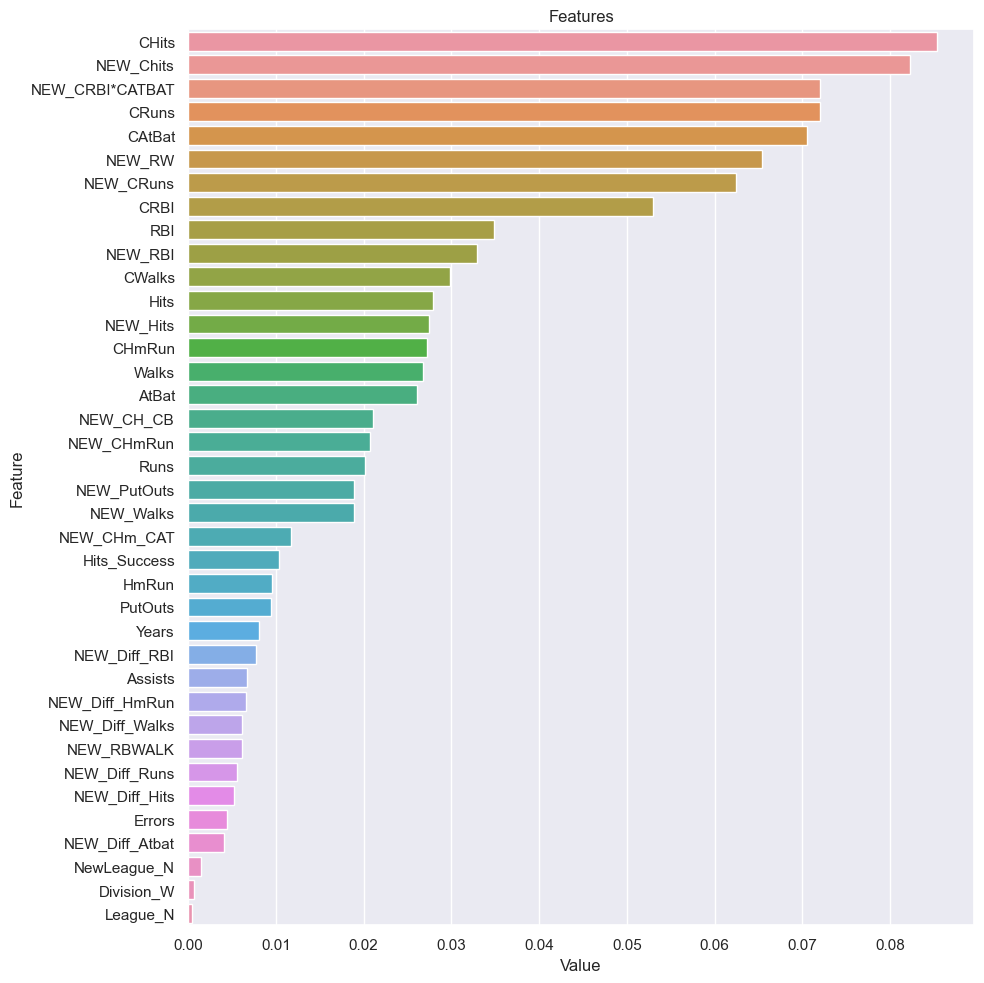

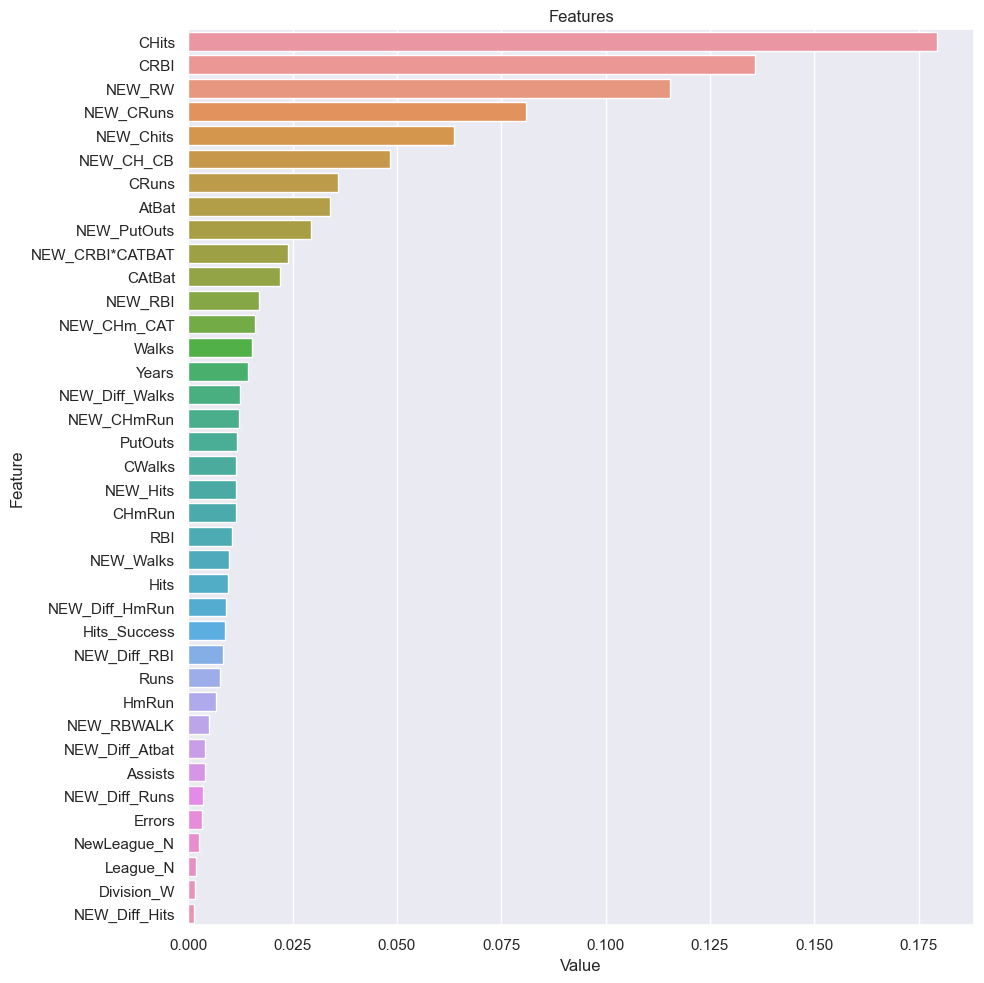

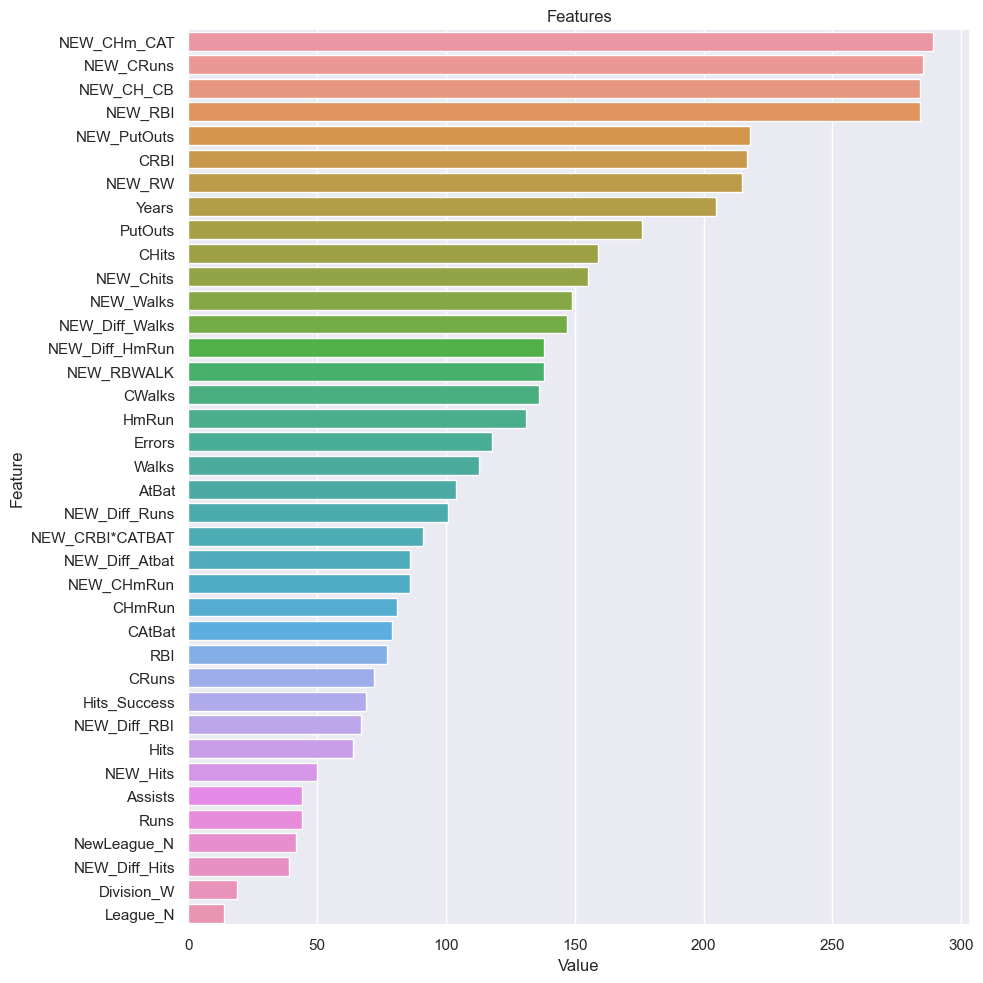

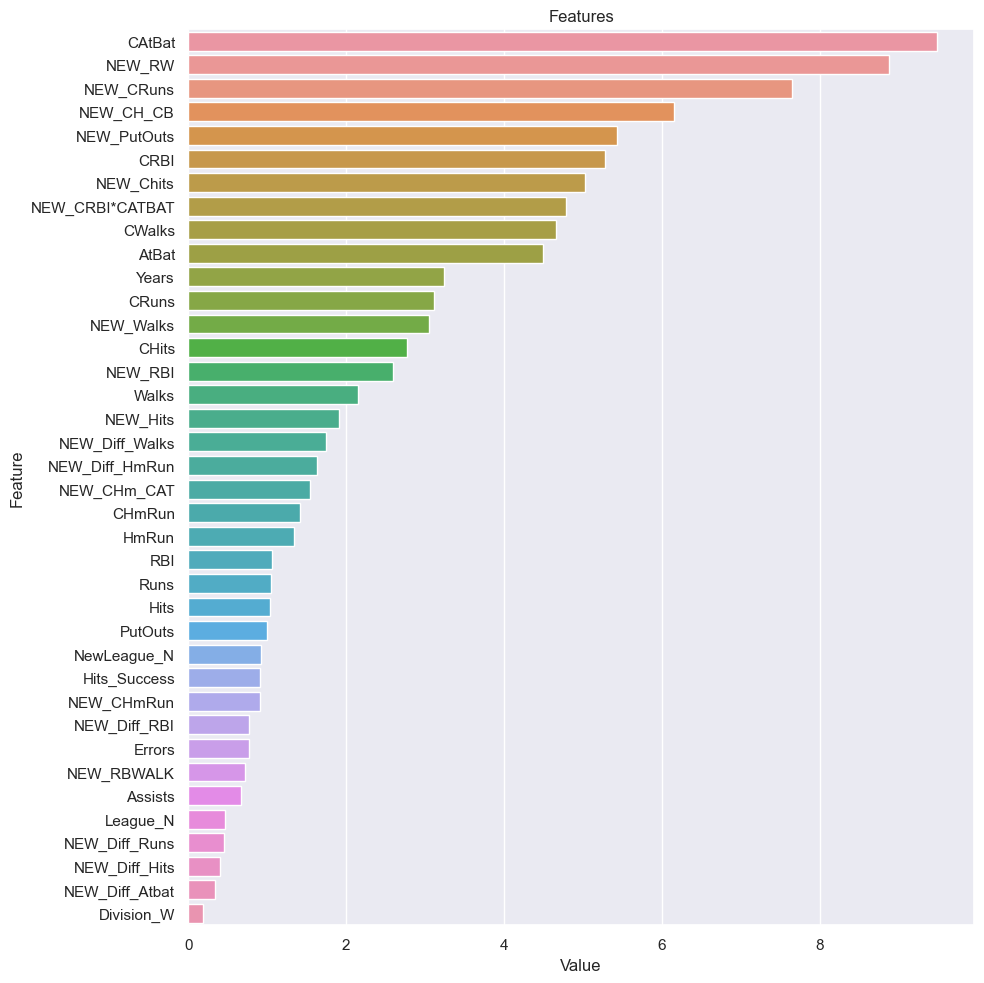

In [119]:
plot_importance(rf_final, X)
plot_importance(gbm_final, X)
plot_importance(lgbm_final, X)
plot_importance(catboost_final, X)

# Analyzing Model Complexity with Learning Curves

In [120]:
def val_curve_params(model, X, y, param_name, param_range, scoring="roc_auc", cv=10):
    train_score, test_score = validation_curve(
        model, X=X, y=y, param_name=param_name, param_range=param_range, scoring=scoring, cv=cv)

    mean_train_score = np.mean(train_score, axis=1)
    mean_test_score = np.mean(test_score, axis=1)

    plt.plot(param_range, mean_train_score,
             label="Training Score", color='b')

    plt.plot(param_range, mean_test_score,
             label="Validation Score", color='g')

    plt.title(f"Validation Curve for {type(model).__name__}")
    plt.xlabel(f"Number of {param_name}")
    plt.ylabel(f"{scoring}")
    plt.tight_layout()
    plt.legend(loc='best')
    plt.show()

In [122]:
rf_val_params = [["max_depth", [5, 8, 15, 20, 30, None]],
                 ["max_features", [3, 5, 7, "auto"]],
                 ["min_samples_split", [2, 5, 8, 15, 20]],
                 ["n_estimators", [10, 50, 100, 200, 500]]]

In [123]:
rf_model = RandomForestRegressor(random_state=17)

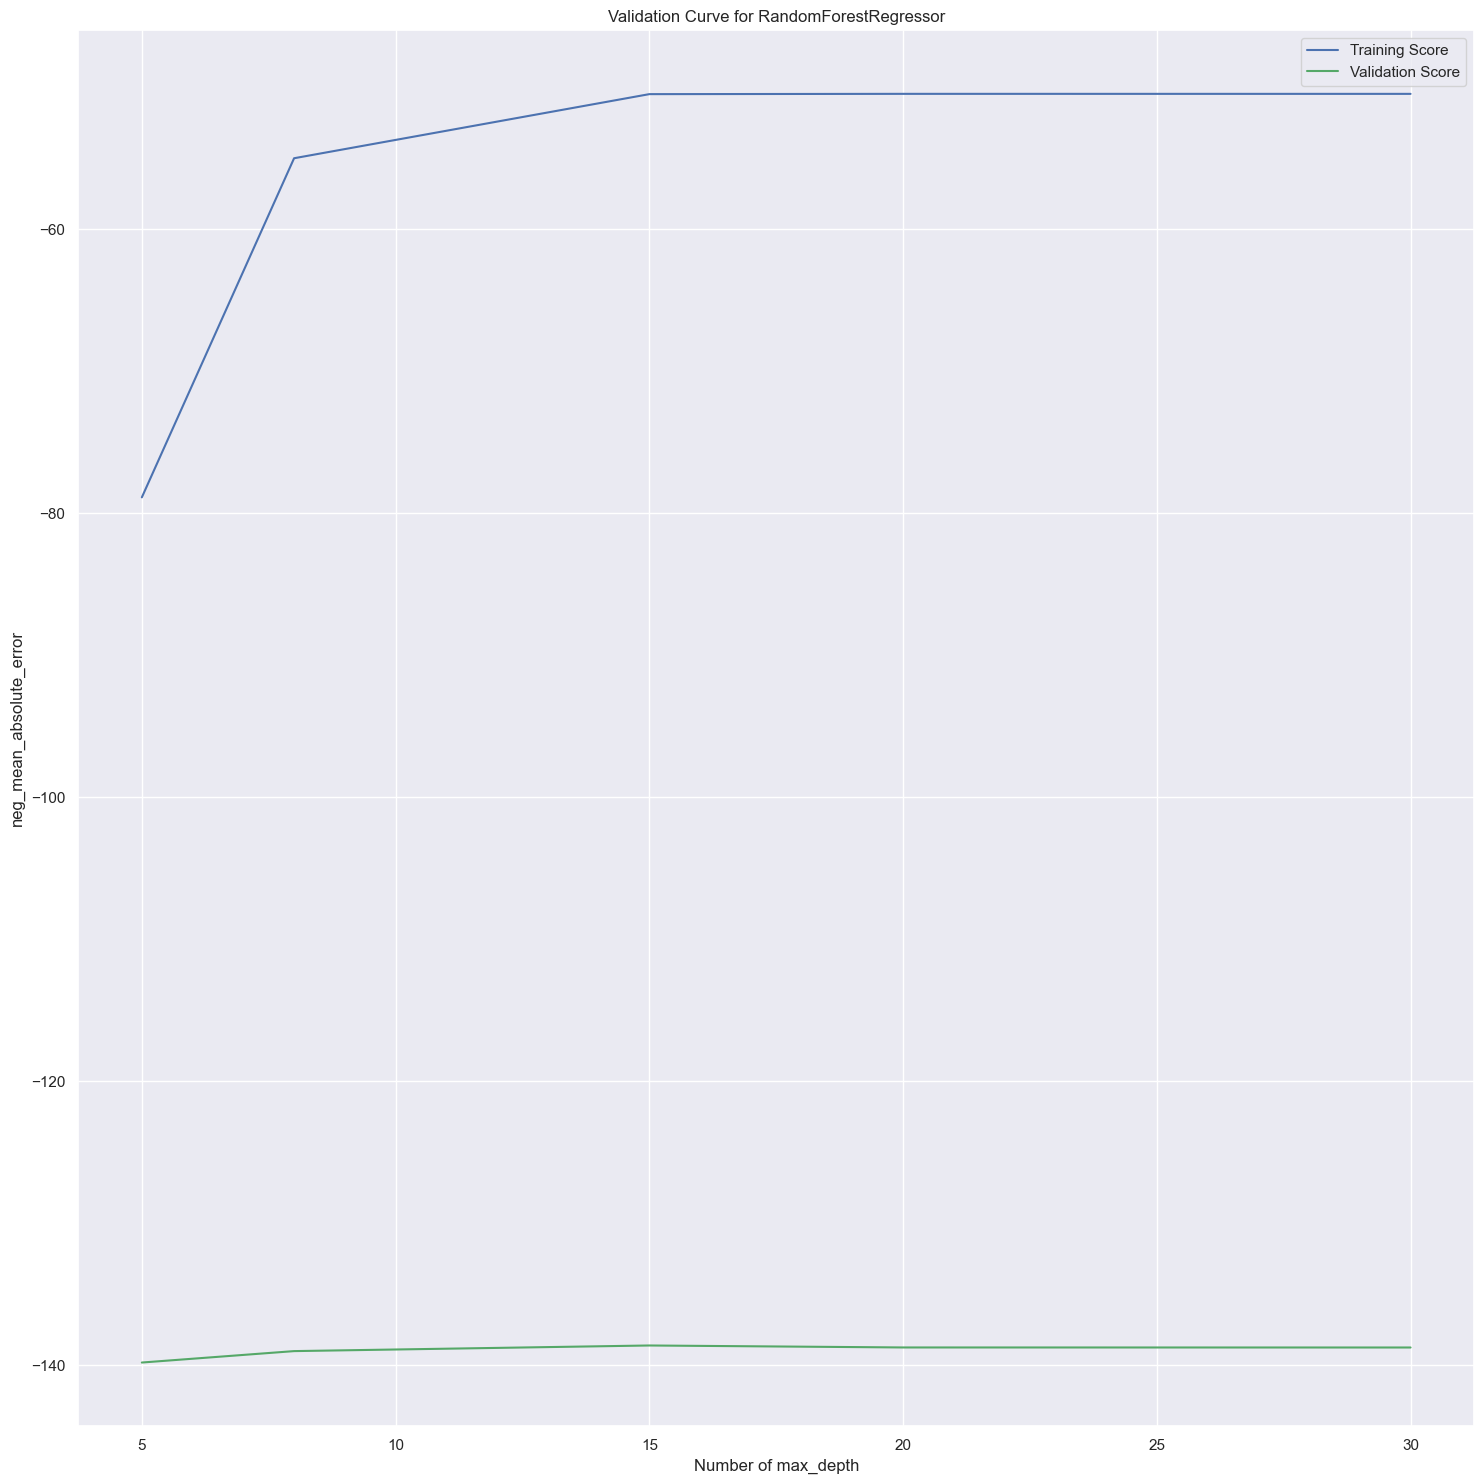

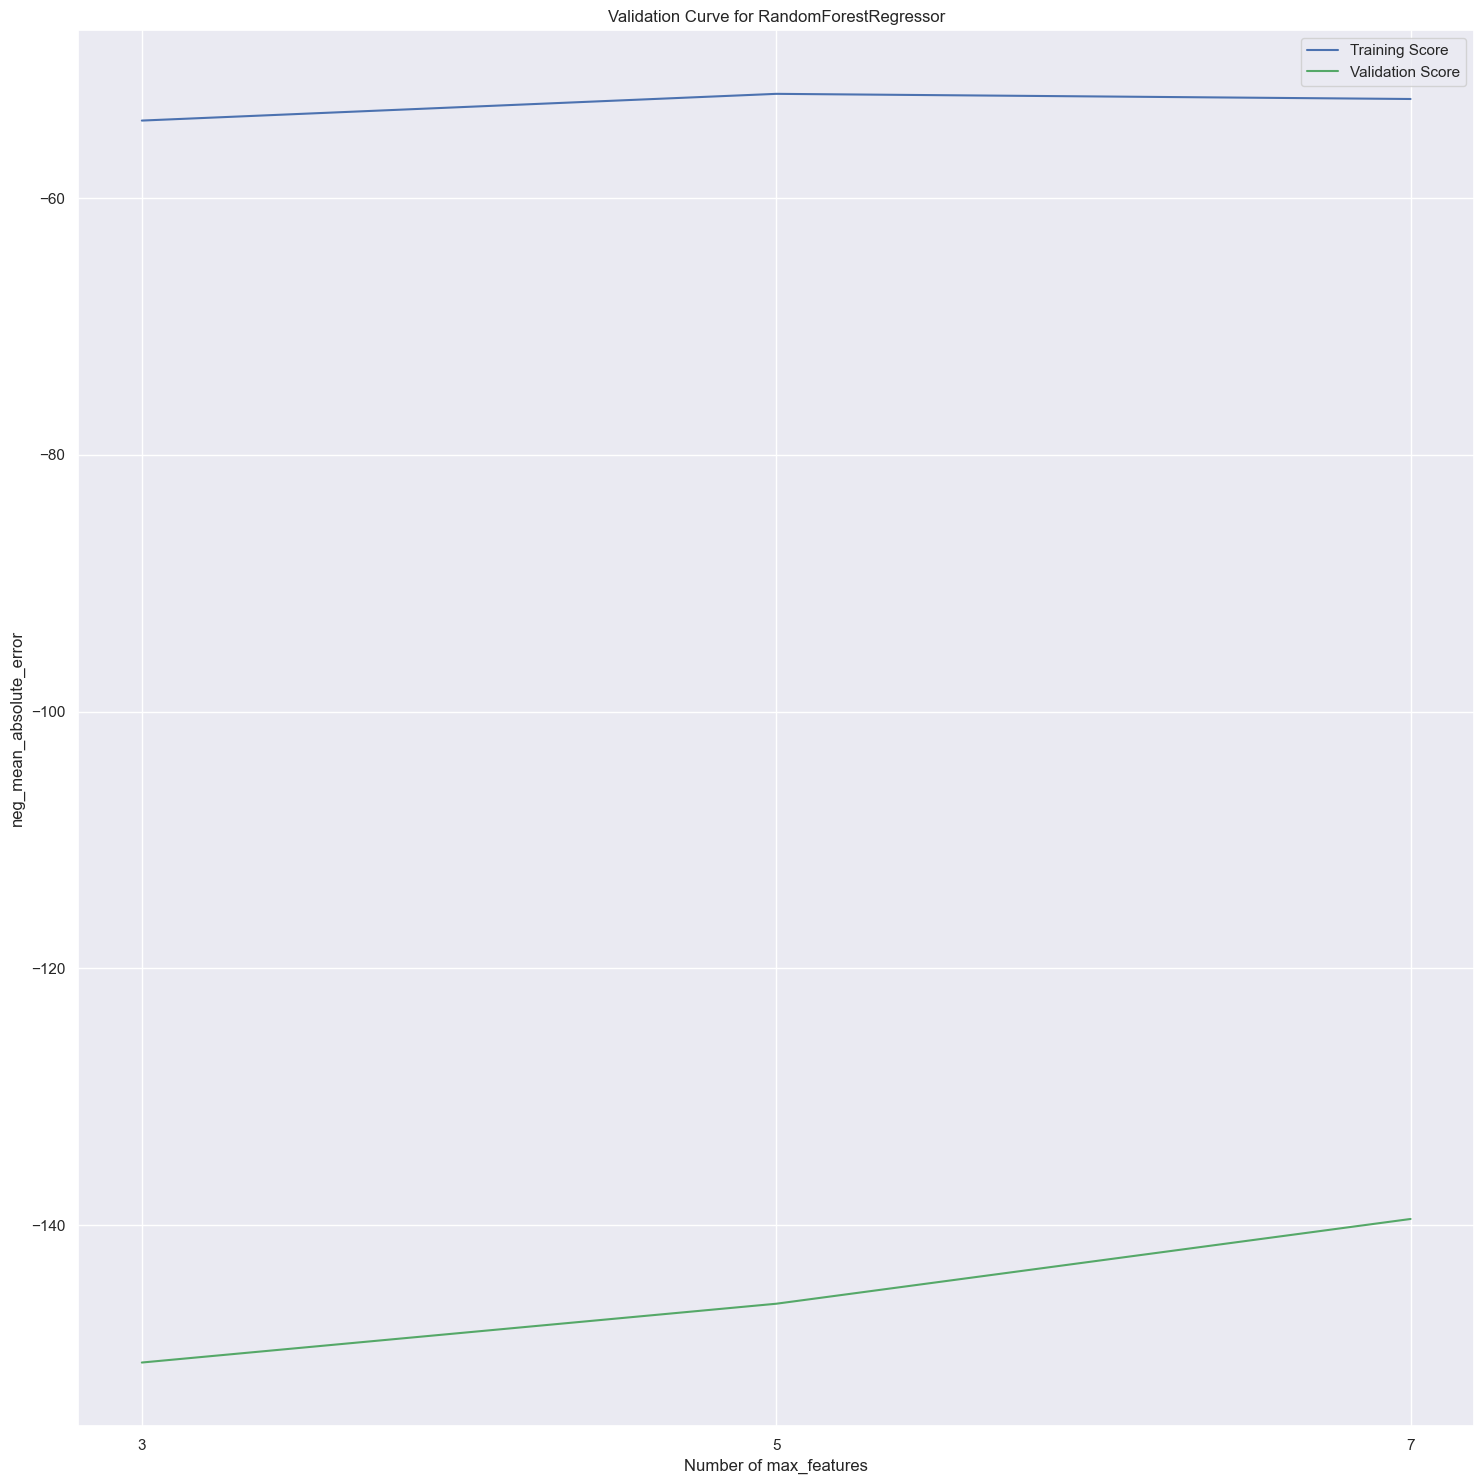

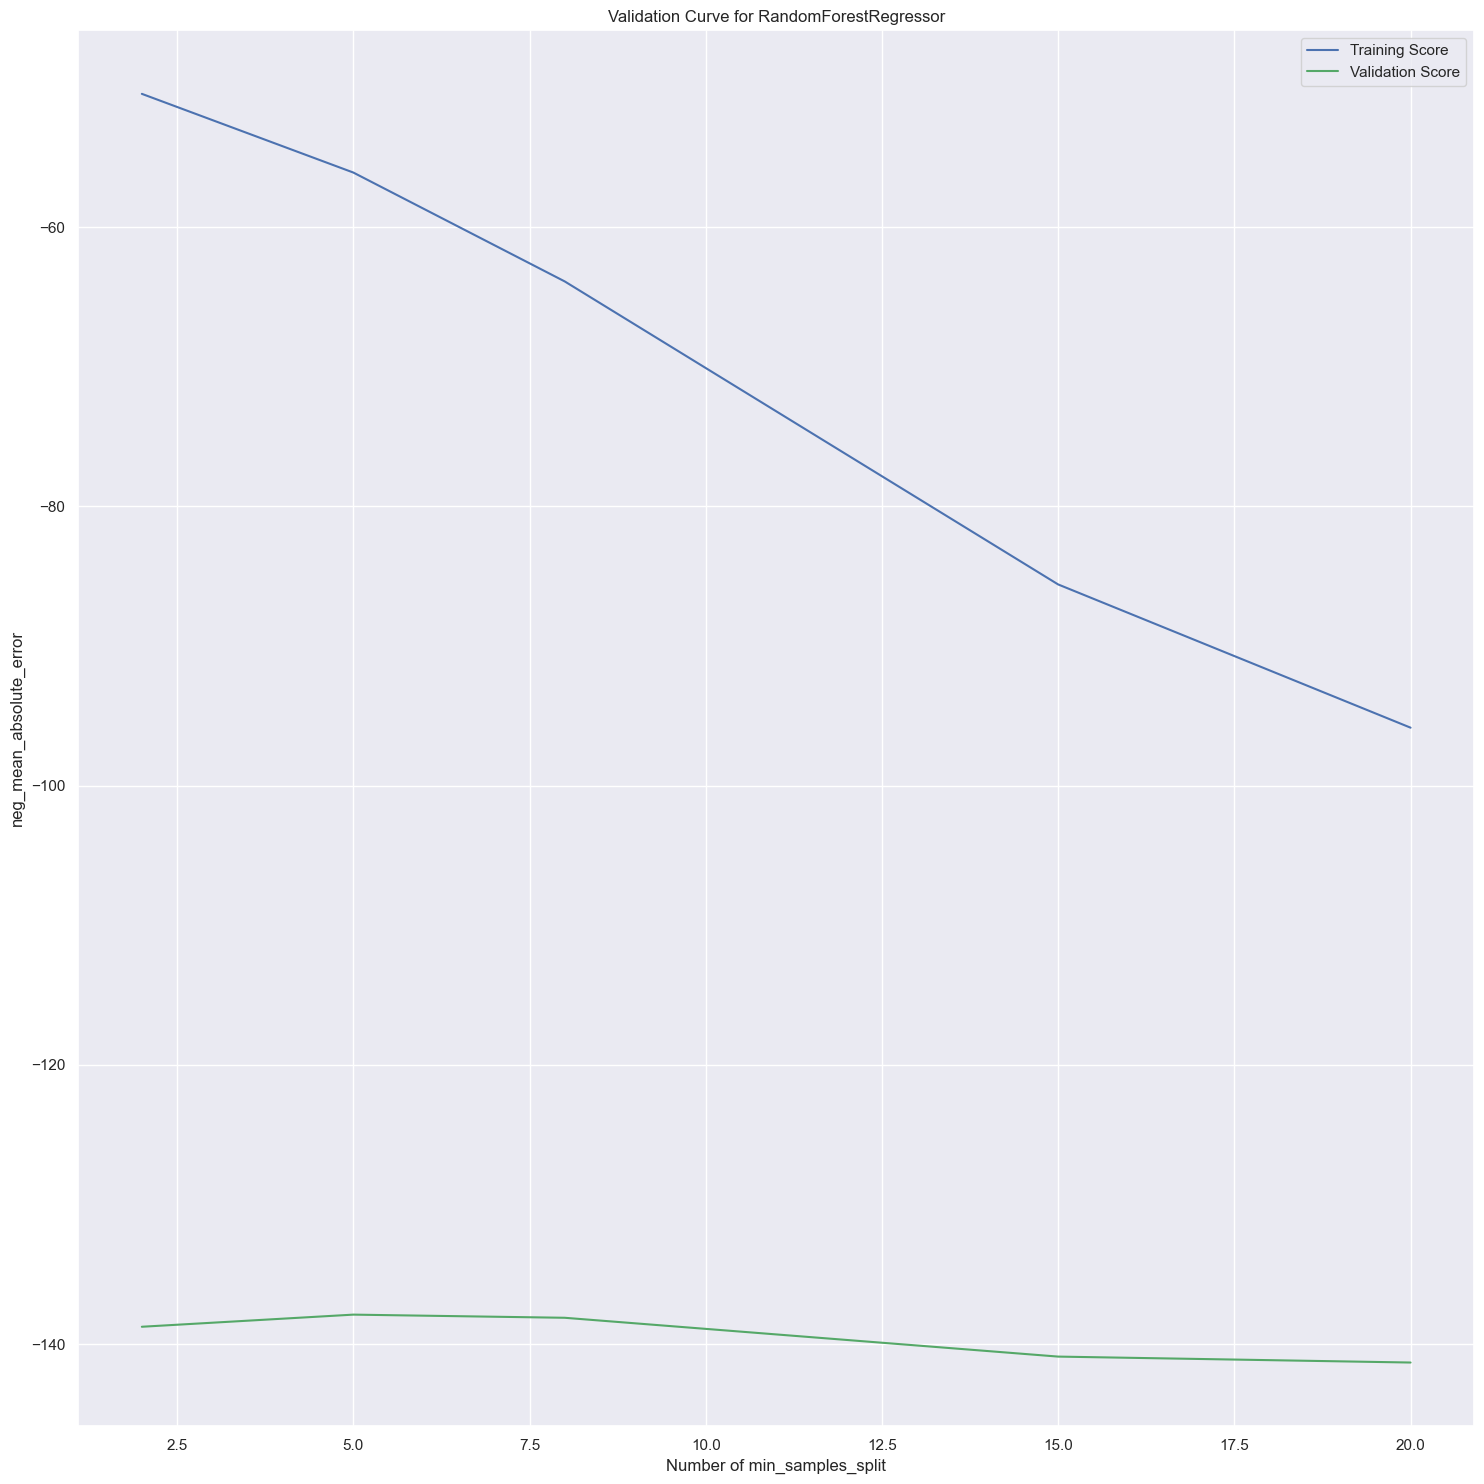

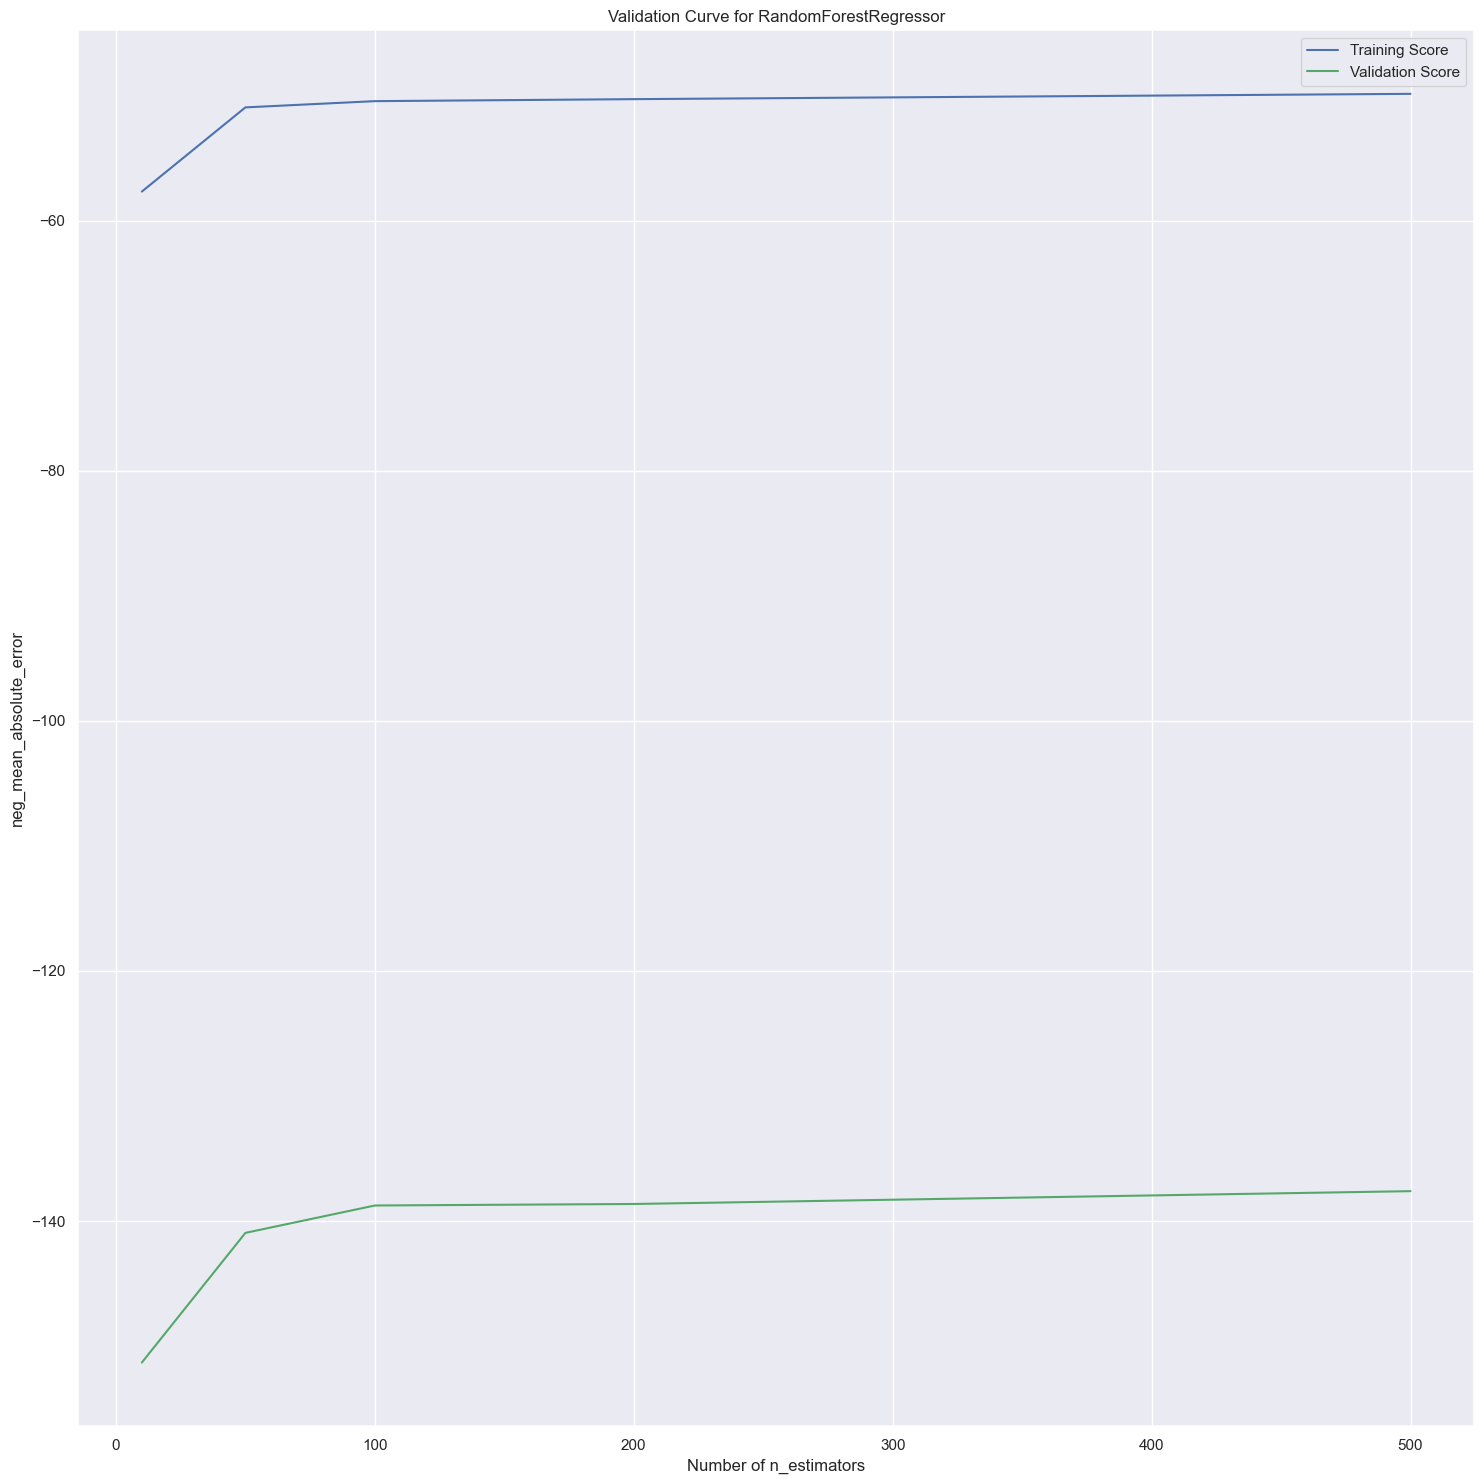

In [124]:
for i in range(len(rf_val_params)):
    val_curve_params(rf_model, X, y, rf_val_params[i][0], rf_val_params[i][1],scoring="neg_mean_absolute_error")

In [125]:
rf_val_params[0][1]

[5, 8, 15, 20, 30, None]

# GUESS

In [129]:
# Guess
y_pred = lgbm_final.predict(X)

# Combine actual and predicted salaries into a DataFrame
results_df = pd.DataFrame({
    'Actual Salary': y,
    'Predicted Salary': y_pred
})

# View the table
print(results_df.head()) 

   Actual Salary  Predicted Salary
1        475.000           509.661
2        480.000           598.218
3        500.000           706.454
4         91.500           128.180
5        750.000           698.621


# THANKS.